#### Deliverables
- A well-formed hypothesis and the question you are trying to answer 
- Data visualization showing correlations between variables and distributions of data
- Exploratory analysis of your data
- Results of your hypothesis testing with evaluation metrics (R square, coefficients of variables, your model)
- A model with at least **three** distinct independent variables, and **two** engineered features
- Examination of linear model assumptions using visualizations
- A coherent and insightful story

## Data Sources

https://databank.worldbank.org/data/reports.aspx?source=world-development-indicators#

http://statisticstimes.com/geography/countries-by-continents.php

## Imports

In [1]:
import pandas as pd

In [2]:
import numpy as np

# Cleaning Data

In [3]:
data = pd.read_csv('World_Data.csv')

In [4]:
data2 = pd.read_csv('World_Data_2.csv')

In [5]:
data3 = pd.read_csv('World_Data_3.csv')

In [6]:
data = pd.concat([data, data2, data3], ignore_index = True)

In [7]:
data.head()

,Country Name,Country Code,Series Name,Series Code,1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],...,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,..,...,44.8548851013184,42.7,43.2220189082037,69.1,67.2595520019531,89.5,71.5,84.1371383666992,..,..
1,Afghanistan,AFG,"Children out of school, primary",SE.PRM.UNER,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,Afghanistan,AFG,"Contraceptive prevalence, modern methods (% of...",SP.DYN.CONM.ZS,..,..,..,..,..,..,...,..,19.9,20.3,13.8,..,..,19.8,..,..,..
3,Afghanistan,AFG,"Contraceptive prevalence, any methods (% of wo...",SP.DYN.CONU.ZS,..,..,..,..,..,..,...,..,21.8,21.2,..,..,..,22.5,..,..,..
4,Afghanistan,AFG,"Maternal mortality ratio (national estimate, p...",SH.STA.MMRT.NE,..,..,..,..,..,..,...,..,330,..,..,..,..,1291,..,..,..


In [8]:
data.shape

(14999, 43)

In [9]:
data['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faroe Is

In [10]:
df = data.drop(['Series Code', 'Country Code'], axis = 1).copy()

In [11]:
df = df.melt(id_vars=['Country Name', 'Series Name'], var_name = 'Year')

In [12]:
df['Year'] = df['Year'].apply(lambda x: int(x.split()[0]))

In [13]:
df['value'] = df['value'].apply(lambda x: float(x) if x != '..' else float('nan'))

In [17]:
pivoted = pd.pivot_table(df, index=['Country Name', 'Year'], columns = 'Series Name', values = 'value')

In [18]:
mortality = pivoted[pivoted['Maternal mortality ratio (modeled estimate, per 100,000 live births)'].notnull()].copy()

In [19]:
mortality.groupby('Year').count()

Series Name,Access to electricity (% of population),"Adjusted net enrollment rate, primary (% of primary school age children)","Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Automated teller machines (ATMs) (per 100,000 adults)",...,"Persistence to last grade of primary, total (% of cohort)","Physicians (per 1,000 people)",Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)","Primary completion rate, total (% of relevant age group)",Progression to secondary school (%),"Pupil-teacher ratio, primary","Pupil-teacher ratio, secondary",Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24)
Year,,,,,,,,,,,,,,,,,,,,,
1990,177,64,50,50,183,128,183,183,183,0,...,53,135,9,136,73,42,105,68,5,5
1991,177,62,51,51,183,128,183,183,183,0,...,67,87,10,136,77,52,116,77,4,4
1992,177,64,53,53,183,128,182,182,182,0,...,60,87,21,136,83,47,114,70,11,11
1993,177,63,52,52,183,128,182,182,182,0,...,63,110,19,136,79,51,113,84,7,7
1994,177,76,61,61,183,128,182,182,182,0,...,61,84,11,136,87,40,120,84,5,6
1995,177,71,57,57,183,128,183,183,183,0,...,63,116,19,136,83,46,110,76,8,8
1996,178,73,59,59,183,128,183,183,183,0,...,53,100,19,136,79,40,105,67,10,10
1997,178,61,52,52,183,128,183,183,183,0,...,38,106,26,136,68,19,91,51,10,10
1998,178,66,55,55,183,128,183,183,183,0,...,66,90,26,136,65,58,111,55,10,10


In [20]:
mortality.corr()

Series Name,Access to electricity (% of population),"Adjusted net enrollment rate, primary (% of primary school age children)","Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Automated teller machines (ATMs) (per 100,000 adults)",...,"Persistence to last grade of primary, total (% of cohort)","Physicians (per 1,000 people)",Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)","Primary completion rate, total (% of relevant age group)",Progression to secondary school (%),"Pupil-teacher ratio, primary","Pupil-teacher ratio, secondary",Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24)
Series Name,,,,,,,,,,,,,,,,,,,,,
Access to electricity (% of population),1.000000,0.734260,0.746298,0.738435,-0.728398,-0.212927,-0.797122,0.561715,-0.806531,0.511769,...,0.821210,0.662345,0.460341,-0.410307,0.795534,0.680855,-0.824782,-0.654061,-0.469166,-0.661178
"Adjusted net enrollment rate, primary (% of primary school age children)",0.734260,1.000000,0.991979,0.989154,-0.649855,-0.138760,-0.679545,0.433661,-0.679742,0.427251,...,0.591254,0.489749,0.550305,-0.190179,0.871612,0.551821,-0.640728,-0.525818,-0.652806,-0.631142
"Adjusted net enrollment rate, primary, female (% of primary school age children)",0.746298,0.991979,1.000000,0.962721,-0.658723,-0.125259,-0.707884,0.451006,-0.706716,0.452835,...,0.599201,0.514690,0.597424,-0.147185,0.885798,0.583327,-0.661539,-0.546107,-0.661120,-0.637094
"Adjusted net enrollment rate, primary, male (% of primary school age children)",0.738435,0.989154,0.962721,1.000000,-0.632823,-0.130227,-0.678414,0.447343,-0.682123,0.439215,...,0.575339,0.504879,0.493449,-0.207987,0.845254,0.548407,-0.619742,-0.521158,-0.607015,-0.582175
"Adolescent fertility rate (births per 1,000 women ages 15-19)",-0.728398,-0.649855,-0.658723,-0.632823,1.000000,0.210501,0.798149,-0.541482,0.802340,-0.513768,...,-0.743806,-0.575692,-0.421292,0.299345,-0.720821,-0.628592,0.737550,0.591962,0.684574,0.845927
Adults (ages 15+) and children (ages 0-14) newly infected with HIV,-0.212927,-0.138760,-0.125259,-0.130227,0.210501,1.000000,0.187959,-0.190983,0.204385,-0.089305,...,-0.271654,-0.243056,-0.041920,0.404001,-0.162017,-0.230789,0.224479,0.273708,0.033648,0.124463
Age dependency ratio (% of working-age population),-0.797122,-0.679545,-0.707884,-0.678414,0.798149,0.187959,1.000000,-0.561105,0.971871,-0.528154,...,-0.763005,-0.607551,-0.516448,0.312607,-0.739626,-0.642674,0.778625,0.612577,0.430649,0.661161
"Age dependency ratio, old (% of working-age population)",0.561715,0.433661,0.451006,0.447343,-0.541482,-0.190983,-0.561105,1.000000,-0.740267,0.646894,...,0.548018,0.727174,0.339329,-0.279779,0.429973,0.423960,-0.568129,-0.551957,-0.279280,-0.421536
"Age dependency ratio, young (% of working-age population)",-0.806531,-0.679742,-0.706716,-0.682123,0.802340,0.204385,0.971871,-0.740267,1.000000,-0.640868,...,-0.775060,-0.716129,-0.523556,0.330038,-0.725426,-0.649331,0.798724,0.658023,0.430670,0.656399


In [21]:
mortality.drop(['Contraceptive prevalence, modern methods (% of women ages 15-49)',
       'Lower secondary completion rate, female (% of relevant age group)',
       'Lower secondary completion rate, male (% of relevant age group)',
       'Adjusted net enrollment rate, primary, female (% of primary school age children)',
       'Adjusted net enrollment rate, primary, male (% of primary school age children)',
       'Births attended by skilled health staff (% of total)',
       'Children out of school, primary, female',
       'Children out of school, primary, male',
       'Maternal mortality ratio (national estimate, per 100,000 live births)',
       'Persistence to grade 5, total (% of cohort)',
       "Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)",
       'Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)',
       'Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)',
       'Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)',
       'Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)',
       'Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)',
       "Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)",
       'Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)',
       'Immunization, DPT (% of children ages 12-23 months)',
       'Immunization, HepB3 (% of one-year-old children)',
       'Lifetime risk of maternal death (%)',
       'Literacy rate, youth total (% of people ages 15-24)',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old (% of working-age population)',
       'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
       'Children (0-14) living with HIV',
       'Children (ages 0-14) newly infected with HIV',
       'Children out of school, primary',
       'Community health workers (per 1,000 people)',
       'Prevalence of HIV, total (% of population ages 15-49)',
       'Access to electricity (% of population)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Automated teller machines (ATMs) (per 100,000 adults)',
       'Compulsory education, duration (years)',
       'Consumption of iodized salt (% of households)',
       'Contraceptive prevalence, any methods (% of women ages 15-49)',
       'Exclusive breastfeeding (% of children under 6 months)',
       'GDP per capita (constant 2010 US$)',
       'Government expenditure on education, total (% of GDP)',
       'Immunization, measles (% of children ages 12-23 months)',
       'Individuals using the Internet (% of population)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'Low-birthweight babies (% of births)',
       'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
       'Mobile cellular subscriptions (per 100 people)',
       'Physicians (per 1,000 people)',
       'Pupil-teacher ratio, primary'], axis = 1, inplace = True)


In [22]:
mortality.groupby('Year').count()

Series Name,Access to electricity (% of population),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (ages 0-14) newly infected with HIV,"Age dependency ratio, young (% of working-age population)","Automated teller machines (ATMs) (per 100,000 adults)","Average working hours of children, working only, ages 7-14 (hours per week)",Children (0-14) living with HIV,Children (ages 0-14) newly infected with HIV,"Children in employment, total (% of children ages 7-14)",...,"Persistence to last grade of primary, total (% of cohort)","Physicians (per 1,000 people)",Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)","Primary completion rate, total (% of relevant age group)",Progression to secondary school (%),"Pupil-teacher ratio, primary","Pupil-teacher ratio, secondary",Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24)
Year,,,,,,,,,,,,,,,,,,,,,
1990,177,64,183,128,183,0,0,94,90,0,...,53,135,9,136,73,42,105,68,5,5
1991,177,62,183,128,183,0,0,94,90,0,...,67,87,10,136,77,52,116,77,4,4
1992,177,64,183,128,182,0,0,94,90,0,...,60,87,21,136,83,47,114,70,11,11
1993,177,63,183,128,182,0,0,94,90,0,...,63,110,19,136,79,51,113,84,7,7
1994,177,76,183,128,182,0,0,94,90,1,...,61,84,11,136,87,40,120,84,5,6
1995,177,71,183,128,183,0,0,94,90,0,...,63,116,19,136,83,46,110,76,8,8
1996,178,73,183,128,183,0,0,94,90,2,...,53,100,19,136,79,40,105,67,10,10
1997,178,61,183,128,183,0,0,94,90,0,...,38,106,26,136,68,19,91,51,10,10
1998,178,66,183,128,183,0,0,94,90,1,...,66,90,26,136,65,58,111,55,10,10


In [23]:
#drop for too little data
mortality.drop(['Average working hours of children, working only, ages 7-14 (hours per week)',
               'Children in employment, total (% of children ages 7-14)',
               'Pregnant women receiving prenatal care (%)',
               'Women who were first married by age 15 (% of women ages 20-24)',
               'Women who were first married by age 18 (% of women ages 20-24)'], axis = 1, inplace = True)


In [29]:
mortality.corr()

Series Name,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)","Automated teller machines (ATMs) (per 100,000 adults)","Compulsory education, duration (years)",Consumption of iodized salt (% of households),"Contraceptive prevalence, any methods (% of women ages 15-49)",Exclusive breastfeeding (% of children under 6 months),GDP per capita (constant 2010 US$),"Government expenditure on education, total (% of GDP)","Immunization, measles (% of children ages 12-23 months)",Individuals using the Internet (% of population),"Literacy rate, adult total (% of people ages 15 and above)",Low-birthweight babies (% of births),"Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Physicians (per 1,000 people)","Pupil-teacher ratio, primary"
Series Name,,,,,,,,,,,,,,,,,
Access to electricity (% of population),1.000000,-0.728398,0.511769,0.394465,0.254018,0.744350,-0.084665,0.452554,0.163871,0.624159,0.465950,0.775576,-0.549785,-0.826534,0.420549,0.662345,-0.824782
"Adolescent fertility rate (births per 1,000 women ages 15-19)",-0.728398,1.000000,-0.513768,-0.315681,-0.208776,-0.622679,-0.213190,-0.495687,-0.256501,-0.598474,-0.470042,-0.643690,0.513690,0.742792,-0.389059,-0.575692,0.737550
"Automated teller machines (ATMs) (per 100,000 adults)",0.511769,-0.513768,1.000000,0.283226,0.163861,0.486144,-0.050062,0.604833,0.177310,0.358415,0.732708,0.538000,-0.347821,-0.490435,0.507722,0.543822,-0.520985
"Compulsory education, duration (years)",0.394465,-0.315681,0.283226,1.000000,0.054661,0.325695,0.031000,0.228259,0.207105,0.306204,0.337349,0.308099,-0.219208,-0.342738,0.317229,0.352615,-0.328742
Consumption of iodized salt (% of households),0.254018,-0.208776,0.163861,0.054661,1.000000,0.399348,0.277299,0.161699,-0.031599,0.352628,0.105756,0.331424,-0.344539,-0.238921,0.013186,0.245186,-0.157479
"Contraceptive prevalence, any methods (% of women ages 15-49)",0.744350,-0.622679,0.486144,0.325695,0.399348,1.000000,0.081645,0.428124,0.141599,0.618877,0.394696,0.768917,-0.544205,-0.734974,0.283942,0.470104,-0.677904
Exclusive breastfeeding (% of children under 6 months),-0.084665,-0.213190,-0.050062,0.031000,0.277299,0.081645,1.000000,-0.064274,-0.011300,0.266207,0.056239,0.059082,-0.120970,-0.130544,0.111888,-0.062770,0.036345
GDP per capita (constant 2010 US$),0.452554,-0.495687,0.604833,0.228259,0.161699,0.428124,-0.064274,1.000000,0.241662,0.286764,0.593994,0.397965,-0.279221,-0.387888,0.378593,0.430756,-0.508362
"Government expenditure on education, total (% of GDP)",0.163871,-0.256501,0.177310,0.207105,-0.031599,0.141599,-0.011300,0.241662,1.000000,0.237225,0.233734,0.257502,-0.170189,-0.220772,0.131119,0.346830,-0.284448


In [30]:
mortality.groupby('Year').count()

Series Name,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)","Automated teller machines (ATMs) (per 100,000 adults)","Compulsory education, duration (years)",Consumption of iodized salt (% of households),"Contraceptive prevalence, any methods (% of women ages 15-49)",Exclusive breastfeeding (% of children under 6 months),GDP per capita (constant 2010 US$),"Government expenditure on education, total (% of GDP)","Immunization, measles (% of children ages 12-23 months)",Individuals using the Internet (% of population),"Literacy rate, adult total (% of people ages 15 and above)",Low-birthweight babies (% of births),"Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Physicians (per 1,000 people)","Pupil-teacher ratio, primary"
Year,,,,,,,,,,,,,,,,,
1990,177,183,0,0,0,14,4,155,46,152,180,16,2,184,180,135,105
1991,177,183,0,0,0,23,5,156,49,153,37,24,3,184,176,87,116
1992,177,183,0,0,0,30,9,158,51,171,48,9,8,184,177,87,114
1993,177,183,0,0,1,29,11,159,55,175,62,4,5,184,177,110,113
1994,177,183,0,0,2,22,7,161,66,176,84,10,6,184,177,84,120
1995,177,183,0,1,1,39,13,170,76,176,125,5,8,184,178,116,110
1996,178,183,0,1,3,39,20,171,76,176,154,8,21,184,178,100,105
1997,178,183,0,7,1,37,13,172,35,176,166,3,12,184,177,106,91
1998,178,183,0,136,4,34,17,172,83,176,171,6,24,184,178,90,111


In [31]:
mortality = mortality.swaplevel(0, 1, axis=0)

In [32]:
mortality = mortality.reset_index()

In [33]:
mortality = mortality[mortality['Country Name'] != 'World']

In [34]:
mortality.groupby('Country Name').count()

Series Name,Year,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)","Automated teller machines (ATMs) (per 100,000 adults)","Compulsory education, duration (years)",Consumption of iodized salt (% of households),"Contraceptive prevalence, any methods (% of women ages 15-49)",Exclusive breastfeeding (% of children under 6 months),GDP per capita (constant 2010 US$),"Government expenditure on education, total (% of GDP)","Immunization, measles (% of children ages 12-23 months)",Individuals using the Internet (% of population),"Literacy rate, adult total (% of people ages 15 and above)",Low-birthweight babies (% of births),"Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Physicians (per 1,000 people)","Pupil-teacher ratio, primary"
Country Name,,,,,,,,,,,,,,,,,,
Afghanistan,26,26,26,12,18,2,8,2,14,6,26,16,1,0,26,26,14,14
Albania,26,26,26,12,18,2,4,4,26,16,26,22,4,4,26,26,17,12
Algeria,26,26,26,12,18,1,7,3,26,1,26,23,3,2,26,26,8,25
Angola,26,26,26,12,18,1,3,1,26,5,26,21,2,1,26,26,4,7
Argentina,26,26,26,12,18,1,4,2,26,20,26,25,10,9,26,26,9,13
Armenia,26,26,26,12,17,1,4,3,26,18,24,23,2,4,26,26,21,13
Australia,26,26,26,12,18,0,6,0,26,19,26,23,0,2,26,26,20,8
Austria,26,26,26,12,18,0,3,0,26,24,26,26,0,2,26,26,22,24
Azerbaijan,26,26,26,10,18,1,4,3,26,21,24,21,9,3,26,26,21,25


In [396]:
mortality.to_csv('mortality.csv')

In [35]:
test_data = mortality[mortality['Year'] == 2010].copy()

In [36]:
test_data.columns

Index(['Year', 'Country Name', 'Access to electricity (% of population)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Automated teller machines (ATMs) (per 100,000 adults)',
       'Compulsory education, duration (years)',
       'Consumption of iodized salt (% of households)',
       'Contraceptive prevalence, any methods (% of women ages 15-49)',
       'Exclusive breastfeeding (% of children under 6 months)',
       'GDP per capita (constant 2010 US$)',
       'Government expenditure on education, total (% of GDP)',
       'Immunization, measles (% of children ages 12-23 months)',
       'Individuals using the Internet (% of population)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'Low-birthweight babies (% of births)',
       'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
       'Mobile cellular subscriptions (per 100 people)',
       'Physicians (per 1,000 people)', 'Pupil-teacher ratio, 

In [37]:
test_data = test_data[['Year', 'Country Name', 
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Automated teller machines (ATMs) (per 100,000 adults)',
       'Compulsory education, duration (years)',
       'GDP per capita (constant 2010 US$)',
       'Immunization, measles (% of children ages 12-23 months)',
       'Individuals using the Internet (% of population)',
       'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
       'Pupil-teacher ratio, primary']]

In [38]:
test_data.drop('Year',axis=1).corr()

Series Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Automated teller machines (ATMs) (per 100,000 adults)","Compulsory education, duration (years)",GDP per capita (constant 2010 US$),"Immunization, measles (% of children ages 12-23 months)",Individuals using the Internet (% of population),"Maternal mortality ratio (modeled estimate, per 100,000 live births)","Pupil-teacher ratio, primary"
Series Name,,,,,,,,
"Adolescent fertility rate (births per 1,000 women ages 15-19)",1.000000,-0.545139,-0.288816,-0.494130,-0.566363,-0.646016,0.765466,0.741198
"Automated teller machines (ATMs) (per 100,000 adults)",-0.545139,1.000000,0.252904,0.608190,0.353102,0.747664,-0.501663,-0.556065
"Compulsory education, duration (years)",-0.288816,0.252904,1.000000,0.263691,0.225291,0.355108,-0.322481,-0.347911
GDP per capita (constant 2010 US$),-0.494130,0.608190,0.263691,1.000000,0.259202,0.815698,-0.410274,-0.501976
"Immunization, measles (% of children ages 12-23 months)",-0.566363,0.353102,0.225291,0.259202,1.000000,0.449783,-0.593406,-0.501623
Individuals using the Internet (% of population),-0.646016,0.747664,0.355108,0.815698,0.449783,1.000000,-0.619359,-0.716882
"Maternal mortality ratio (modeled estimate, per 100,000 live births)",0.765466,-0.501663,-0.322481,-0.410274,-0.593406,-0.619359,1.000000,0.835119
"Pupil-teacher ratio, primary",0.741198,-0.556065,-0.347911,-0.501976,-0.501623,-0.716882,0.835119,1.000000


In [39]:
test_data.columns = ['Year', 'Country','Teen_fertility','ATMs','Compulsory_Ed','GDP_pc','Immunization_measles',
       'Internet_use','Maternal_mort_ratio','Pupil_teacher_ratio']

In [40]:
test_data.head()

,Year,Country,Teen_fertility,ATMs,Compulsory_Ed,GDP_pc,Immunization_measles,Internet_use,Maternal_mort_ratio,Pupil_teacher_ratio
20,2010,Afghanistan,98.6322,0.532064,9.0,550.514974,62.0,4.0,584.0,44.41709
46,2010,Albania,19.8208,34.136791,8.0,4094.360204,99.0,45.0,30.0,19.70208
72,2010,Algeria,10.8084,5.895808,10.0,4463.394675,95.0,12.5,147.0,23.32803
98,2010,Angola,172.0946,10.467709,6.0,3585.905553,67.0,2.8,561.0,45.58651
124,2010,Argentina,63.8792,41.907589,13.0,10276.260498,95.0,45.0,58.0,NaN


# EDA

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

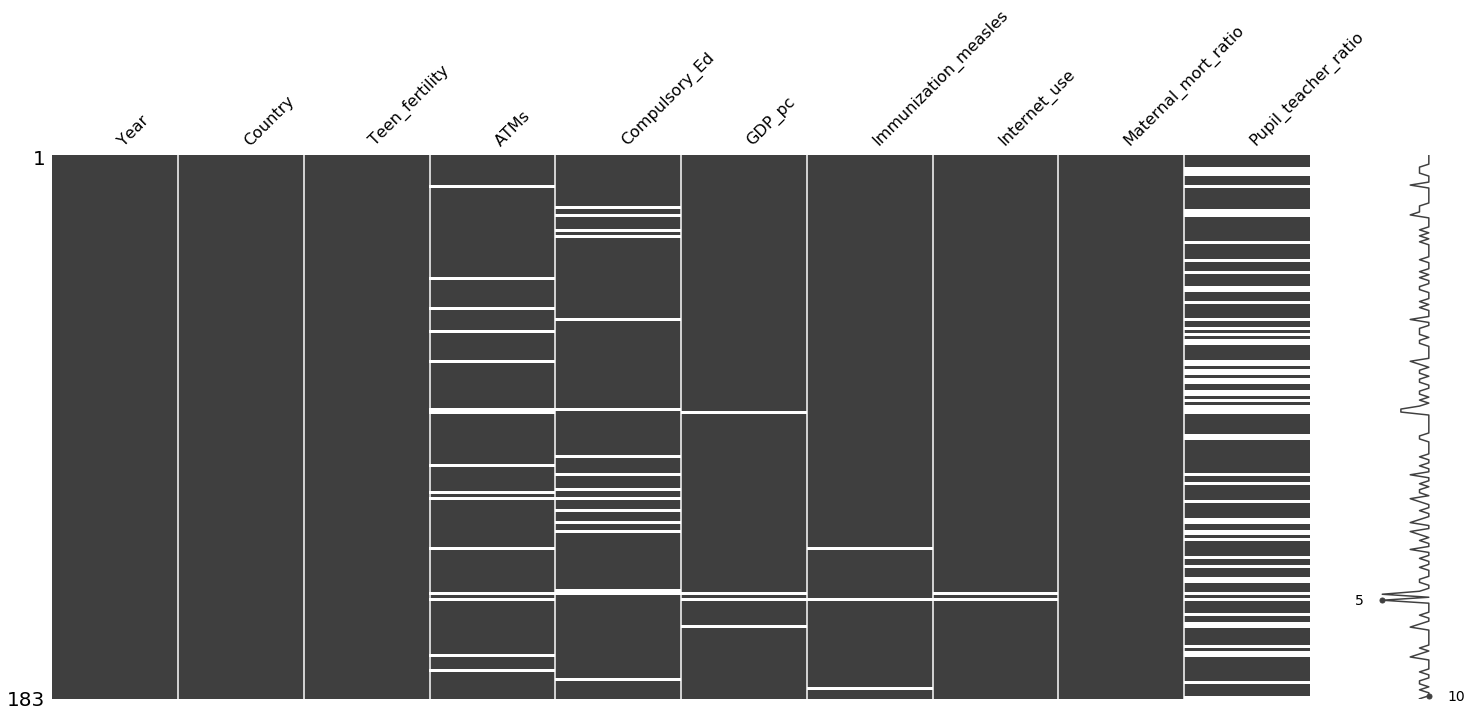

In [41]:
import missingno as msno
%matplotlib inline
msno.matrix(test_data.iloc[:,:])

In [43]:
test_data['Maternal_mort_ratio'].describe()

count     183.000000
mean      194.338798
std       265.671169
min         3.000000
25%        16.000000
50%        59.000000
75%       305.500000
max      1630.000000
Name: Maternal_mort_ratio, dtype: float64

In [44]:
test_data[test_data['Maternal_mort_ratio'] == 1630]

,Year,Country,Teen_fertility,ATMs,Compulsory_Ed,GDP_pc,Immunization_measles,Internet_use,Maternal_mort_ratio,Pupil_teacher_ratio
3712,2010,Sierra Leone,134.3892,0.386752,9.0,399.154368,82.0,0.58,1630.0,NaN


In [45]:
test_data.sort_values('Maternal_mort_ratio', ascending = False).head(15)

,Year,Country,Teen_fertility,ATMs,Compulsory_Ed,GDP_pc,Immunization_measles,Internet_use,Maternal_mort_ratio,Pupil_teacher_ratio
3712,2010,Sierra Leone,134.3892,0.386752,9.0,399.154368,82.0,0.58,1630.0,NaN
826,2010,Chad,185.3640,0.425380,10.0,896.569734,46.0,1.70,1040.0,62.20393
800,2010,Central African Republic,114.8780,0.664211,10.0,446.443688,53.0,2.00,909.0,84.32027
3894,2010,South Sudan,86.1788,NaN,8.0,NaN,NaN,NaN,876.0,NaN
3140,2010,Nigeria,119.5004,11.219582,9.0,2291.360013,56.0,11.50,867.0,37.55319
3842,2010,Somalia,117.0854,NaN,NaN,NaN,46.0,NaN,820.0,NaN
2464,2010,Liberia,137.1728,1.475385,6.0,506.063005,65.0,2.30,811.0,NaN
670,2010,Burundi,31.2920,0.510020,NaN,231.795537,92.0,1.00,808.0,50.60210
956,2010,"Congo, Dem. Rep.",129.9144,0.405734,6.0,334.231703,74.0,0.72,794.0,37.01310
1554,2010,"Gambia, The",97.9730,NaN,9.0,562.483782,92.0,9.20,753.0,37.48167


In [46]:
test_data.drop('Pupil_teacher_ratio', axis = 1, inplace = True)

In [47]:
test_data['ATMs'].describe()

count    168.000000
mean      39.553658
std       42.981532
min        0.000000
25%        5.816035
50%       28.722694
75%       55.315524
max      265.375421
Name: ATMs, dtype: float64

In [48]:
dfs = pd.read_html('http://statisticstimes.com/geography/countries-by-continents.php')

In [49]:
africa = dfs[2].copy()
asia = dfs[3].copy()
europe = dfs[4].copy()
north_america = dfs[5].copy()
south_america = dfs[6].copy()
oceania = dfs[7].copy()

In [55]:
clist = ['Africa', 'Asia','Europe','North America','South America','Oceania']
df_list = [africa, asia, europe, north_america, south_america, oceania]

for i in range(len(df_list)):
    df_list[i]['Continent'] = clist[i]
    

In [56]:
region_df = pd.concat(df_list)

In [57]:
region_df.columns = ['Country', 'Region', 'Continent']

In [58]:
test_data = pd.merge(test_data, region_df, on='Country', how='left')

In [88]:
test_data.iloc[108,9] = 'Eastern Europe'
test_data.iloc[108,10] = 'Europe'

test_data.iloc[121,9] = 'Southern Europe'
test_data.iloc[121,10] = 'Europe'

test_data.iloc[144,9] = 'Eastern Europe'
test_data.iloc[144,10] = 'Europe'

test_data.iloc[152,9] = 'Caribbean'
test_data.iloc[152,10] = 'North America'

test_data.iloc[153,9] = 'Caribbean'
test_data.iloc[153,10] = 'North America'

test_data.iloc[160,9] = 'Eastern Africa'
test_data.iloc[160,10] = 'Africa'

test_data.iloc[172,9] = 'Northern Europe'
test_data.iloc[172,10] = 'Europe'

test_data.iloc[173,9] = 'Northern America'
test_data.iloc[173,10] = 'North America'

test_data.iloc[177,9] = 'South America'
test_data.iloc[177,10] = 'South America'

test_data.iloc[178,9] = 'South-Eastern Asia'
test_data.iloc[178,10] = 'Asia'

test_data.iloc[179,9] = 'Western Asia'
test_data.iloc[179,10] = 'Asia'

In [89]:
test_data[test_data['Continent'].isnull()]

,Year,Country,Teen_fertility,ATMs,Compulsory_Ed,GDP_pc,Immunization_measles,Internet_use,Maternal_mort_ratio,Region,Continent


In [90]:
mean_by_region = test_data.groupby('Region').mean()

In [91]:
test_data['Compulsory_Ed'].fillna(test_data['Compulsory_Ed'].mean(), inplace = True)

In [98]:
test_data[(test_data['ATMs'].isnull())]

,Year,Country,Teen_fertility,ATMs,Compulsory_Ed,GDP_pc,Immunization_measles,Internet_use,Maternal_mort_ratio,Region,Continent


In [96]:
NA_ATMs = list(test_data[(test_data['ATMs'].isnull())]['Region'].unique())

In [97]:
for c in NA_ATMs:
    for i in list(test_data[(test_data['ATMs'].isnull())&(test_data['Region'] == c)].index):
        test_data.iloc[i,3] = mean_by_region['ATMs'][c]

In [101]:
test_data[(test_data['Immunization_measles'].isnull())]

,Year,Country,Teen_fertility,ATMs,Compulsory_Ed,GDP_pc,Immunization_measles,Internet_use,Maternal_mort_ratio,Region,Continent


In [100]:
test_data.iloc[132,6] = mean_by_region['Immunization_measles']['Caribbean']
test_data.iloc[149,6] = mean_by_region['Immunization_measles']['Eastern Africa']
test_data.iloc[179,6] = mean_by_region['Immunization_measles']['Western Asia']

In [104]:
test_data[(test_data['Internet_use'].isnull())]

,Year,Country,Teen_fertility,ATMs,Compulsory_Ed,GDP_pc,Immunization_measles,Internet_use,Maternal_mort_ratio,Region,Continent


In [103]:
test_data.iloc[147,7] = mean_by_region['Internet_use']['Eastern Africa']
test_data.iloc[149,7] = mean_by_region['Internet_use']['Eastern Africa']

In [109]:
test_data[(test_data['GDP_pc'].isnull())]

,Year,Country,Teen_fertility,ATMs,Compulsory_Ed,GDP_pc,Immunization_measles,Internet_use,Maternal_mort_ratio,Region,Continent


In [106]:
med_by_region = test_data.groupby('Region').median()

In [107]:
test_data.iloc[147,5] = med_by_region['GDP_pc']['Eastern Africa']
test_data.iloc[149,5] = med_by_region['GDP_pc']['Eastern Africa']

In [108]:
test_data.iloc[86,5] = med_by_region['GDP_pc']['Eastern Asia']
test_data.iloc[158,5] = med_by_region['GDP_pc']['Western Asia']

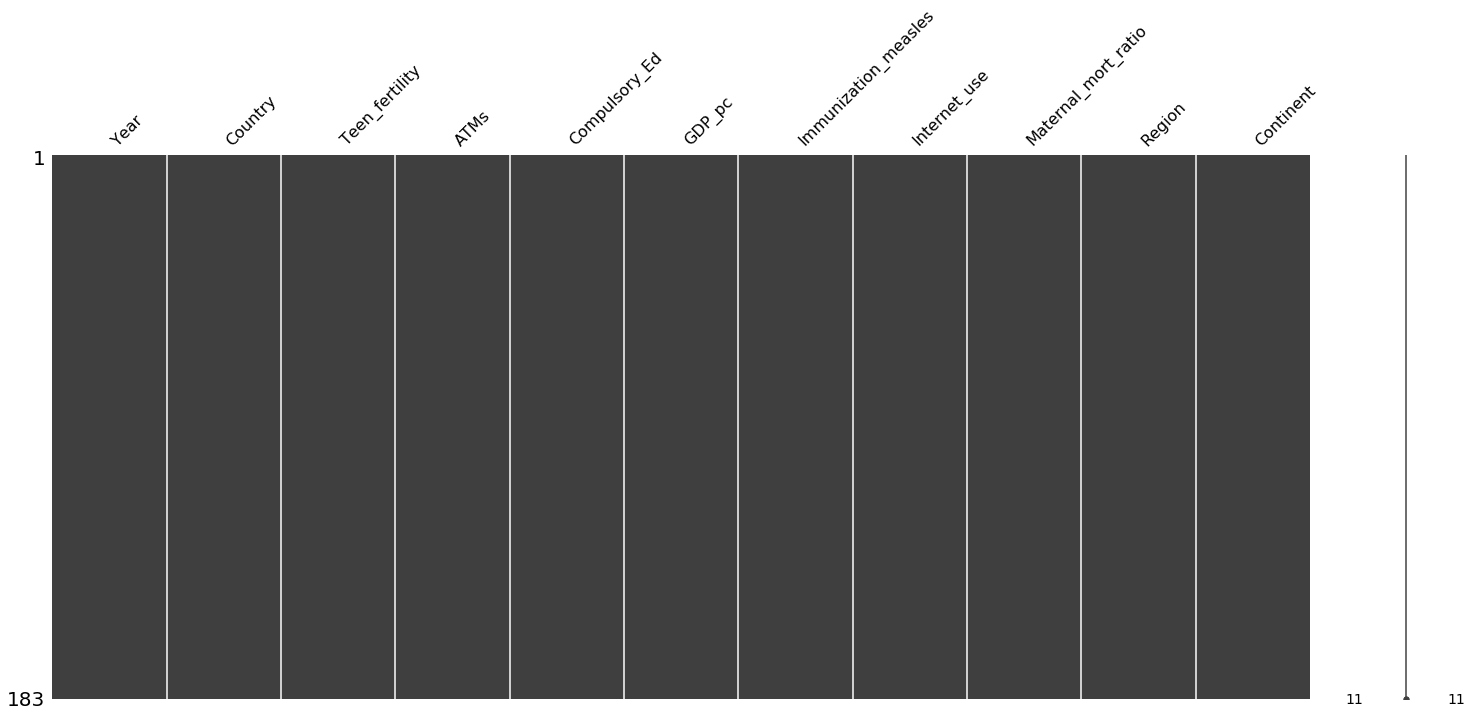

In [110]:
msno.matrix(test_data.iloc[:,:])

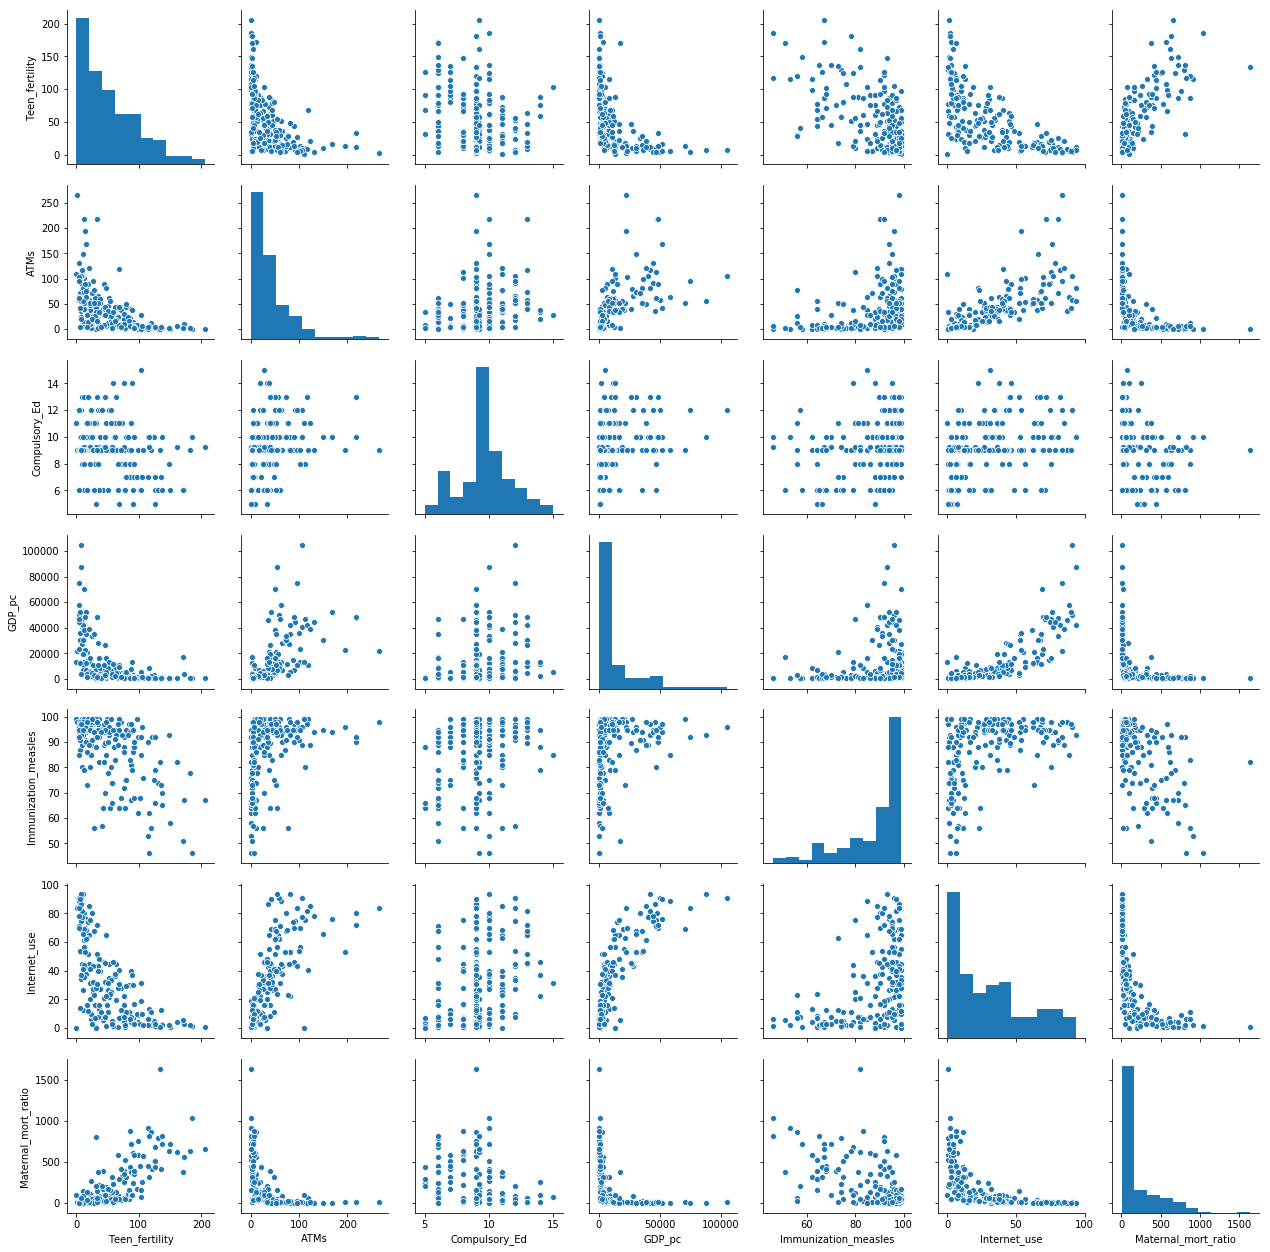

In [111]:
sns.pairplot(test_data.drop('Year', axis = 1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c278d6780>,
      dtype=object)

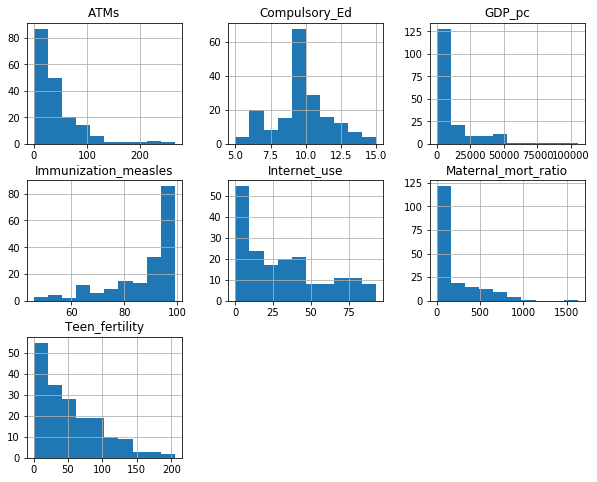

In [149]:
test_data[['Teen_fertility', 'ATMs', 'Compulsory_Ed', 'GDP_pc','Immunization_measles', 'Internet_use', 'Maternal_mort_ratio']].hist(figsize=(10,8))

/Users/samantha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


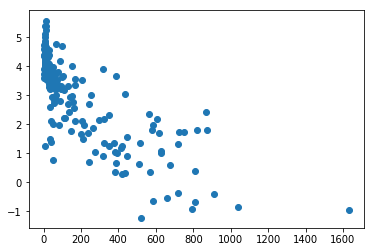

In [112]:
test_data['log_ATMs'] = np.log(test_data['ATMs'])
plt.scatter(test_data['Maternal_mort_ratio'],test_data['log_ATMs'])

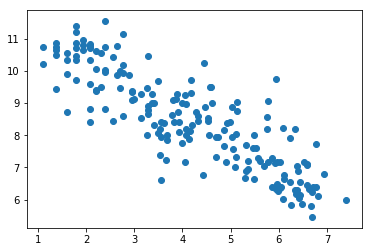

In [113]:
plt.scatter(np.log(test_data['Maternal_mort_ratio']),np.log(test_data['GDP_pc']))

In [114]:
test_data['log_MMR'] =  np.log(test_data['Maternal_mort_ratio'])

In [115]:
test_data['log_GDP'] =  np.log(test_data['GDP_pc'])

In [116]:
test_data['log_internet'] =  np.log(test_data['Internet_use'])

/Users/samantha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2904d898>,
      dtype=object)

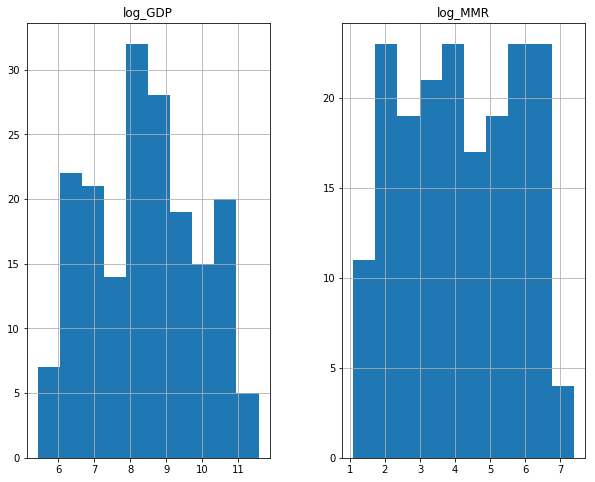

In [153]:
test_data[['log_MMR', 'log_GDP']].hist(figsize = (10,8))

In [117]:
test_data.head()

,Year,Country,Teen_fertility,ATMs,Compulsory_Ed,GDP_pc,Immunization_measles,Internet_use,Maternal_mort_ratio,Region,Continent,log_ATMs,log_MMR,log_GDP,log_internet
0,2010,Afghanistan,98.6322,0.532064,9.0,550.514974,62.0,4.0,584.0,Southern Asia,Asia,-0.630992,6.369901,6.310854,1.386294
1,2010,Albania,19.8208,34.136791,8.0,4094.360204,99.0,45.0,30.0,Southern Europe,Europe,3.530376,3.401197,8.317366,3.806662
2,2010,Algeria,10.8084,5.895808,10.0,4463.394675,95.0,12.5,147.0,Northern Africa,Africa,1.774242,4.990433,8.403665,2.525729
3,2010,Angola,172.0946,10.467709,6.0,3585.905553,67.0,2.8,561.0,Middle Africa,Africa,2.348295,6.329721,8.184766,1.029619
4,2010,Argentina,63.8792,41.907589,13.0,10276.260498,95.0,45.0,58.0,South America,South America,3.735467,4.060443,9.237592,3.806662


In [118]:
test_data.drop('Year', axis=1).corr()

,Teen_fertility,ATMs,Compulsory_Ed,GDP_pc,Immunization_measles,Internet_use,Maternal_mort_ratio,log_ATMs,log_MMR,log_GDP,log_internet
Teen_fertility,1.000000,-0.533852,-0.269641,-0.495486,-0.566298,-0.649391,0.765466,-0.698562,0.791104,-0.663078,-0.688949
ATMs,-0.533852,1.000000,0.278786,0.619049,0.339857,0.722942,-0.495489,0.775440,-0.668243,0.712555,0.635820
Compulsory_Ed,-0.269641,0.278786,1.000000,0.260910,0.212865,0.344609,-0.305744,0.340805,-0.349949,0.353557,0.394774
GDP_pc,-0.495486,0.619049,0.260910,1.000000,0.262861,0.813016,-0.412616,0.557011,-0.664285,0.811707,0.599820
Immunization_measles,-0.566298,0.339857,0.212865,0.262861,1.000000,0.452870,-0.587382,0.536995,-0.560787,0.424628,0.537353
Internet_use,-0.649391,0.722942,0.344609,0.813016,0.452870,1.000000,-0.620461,0.762288,-0.854247,0.872047,0.866317
Maternal_mort_ratio,0.765466,-0.495489,-0.305744,-0.412616,-0.587382,-0.620461,1.000000,-0.779290,0.823644,-0.708849,-0.769740
log_ATMs,-0.698562,0.775440,0.340805,0.557011,0.536995,0.762288,-0.779290,1.000000,-0.803806,0.824478,0.848792
log_MMR,0.791104,-0.668243,-0.349949,-0.664285,-0.560787,-0.854247,0.823644,-0.803806,1.000000,-0.853016,-0.831437
log_GDP,-0.663078,0.712555,0.353557,0.811707,0.424628,0.872047,-0.708849,0.824478,-0.853016,1.000000,0.838599


# Model Testing

In [119]:
import statsmodels.api as sm
import pylab
import statsmodels.formula.api as smf

In [120]:
results_mmr_tf = smf.ols('Maternal_mort_ratio ~ Teen_fertility', test_data).fit()
results_mmr_tf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Maternal_mort_ratio   R-squared:                       0.586
Model:                             OLS   Adj. R-squared:                  0.584
Method:                  Least Squares   F-statistic:                     256.1
Date:                 Thu, 18 Apr 2019   Prob (F-statistic):           1.70e-36
Time:                         10:31:30   Log-Likelihood:                -1200.0
No. Observations:                  183   AIC:                             2404.
Df Residuals:                      181   BIC:                             2410.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -53.4363     20.007     -2.671      0.008     -92.913     -13.960
Teen_fertility     4.5939      0.287     16.004      0.000       4.028       5.160
==============================================================================
Omnibus:                      103.509   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              761.413
Skew:                           2.008   Prob(JB):                    4.58e-166
Kurtosis:                      12.150   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
results_mmr_tf.params

Intercept        -53.436323
Teen_fertility     4.593901
dtype: float64

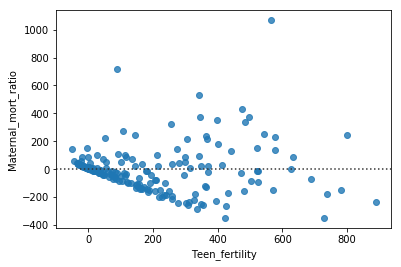

In [122]:
Y_mmr_tf = results_mmr_tf.params[0] + test_data['Teen_fertility']*results_mmr_tf.params[1] 

sns.residplot(Y_mmr_tf,test_data['Maternal_mort_ratio'])

In [123]:
results_lmmr_tf = smf.ols('log_MMR ~ Teen_fertility', test_data).fit()
results_lmmr_tf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_MMR   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     302.8
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           1.71e-40
Time:                        10:31:45   Log-Likelihood:                -261.35
No. Observations:                 183   AIC:                             526.7
Df Residuals:                     181   BIC:                             533.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.5752      0.118     21.744      0.000       2.342       2.809
Teen_fertility     0.0296      0.002     17.400      0.000       0.026       0.033
==============================================================================
Omnibus:                        5.922   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.768
Skew:                           0.389   Prob(JB):                       0.0559
Kurtosis:                       2.611   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

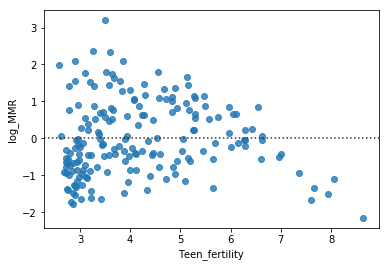

In [124]:
Y_lmmr_tf = results_lmmr_tf.params[0] + test_data['Teen_fertility']*results_lmmr_tf.params[1] 

sns.residplot(Y_lmmr_tf,test_data['log_MMR'])

In [125]:
results_lmmr_iu = smf.ols('log_MMR ~ Internet_use', test_data).fit()
results_lmmr_iu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_MMR   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     488.7
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           2.61e-53
Time:                        10:31:54   Log-Likelihood:                -231.59
No. Observations:                 183   AIC:                             467.2
Df Residuals:                     181   BIC:                             473.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.8101      0.098     59.395      0.000       5.617       6.003
Internet_use    -0.0523      0.002    -22.107      0.000      -0.057      -0.048
==============================================================================
Omnibus:                       10.456   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.780
Skew:                          -0.588   Prob(JB):                      0.00456
Kurtosis:                       3.173   Cond. No.                         63.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

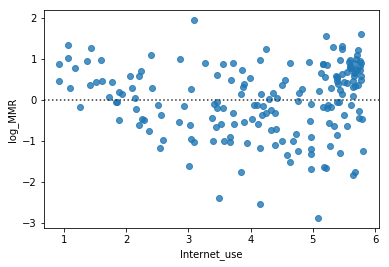

In [126]:
Y_lmmr_iu = results_lmmr_iu.params[0] + test_data['Internet_use']*results_lmmr_iu.params[1] 

sns.residplot(Y_lmmr_iu,test_data['log_MMR'])

In [127]:
results_lmmr_iu_tf = smf.ols('log_MMR ~ Internet_use+Teen_fertility', test_data).fit()
results_lmmr_iu_tf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_MMR   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     428.3
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           3.73e-69
Time:                        10:32:06   Log-Likelihood:                -191.11
No. Observations:                 183   AIC:                             388.2
Df Residuals:                     180   BIC:                             397.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.4765      0.155     28.932      0.000       4.171       4.782
Internet_use      -0.0361      0.003    -14.416      0.000      -0.041      -0.031
Teen_fertility     0.0153      0.002     10.007      0.000       0.012       0.018
==============================================================================
Omnibus:                        1.916   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.384   Jarque-Bera (JB):                1.625
Skew:                          -0.224   Prob(JB):                        0.444
Kurtosis:                       3.107   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

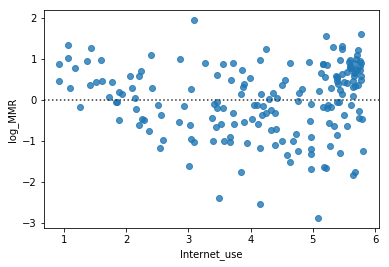

In [128]:
Y_lmmr_iu = results_lmmr_iu.params[0] + test_data['Internet_use']*results_lmmr_iu.params[1] 

sns.residplot(Y_lmmr_iu,test_data['log_MMR'])

In [129]:
test_data.columns

Index(['Year', 'Country', 'Teen_fertility', 'ATMs', 'Compulsory_Ed', 'GDP_pc',
       'Immunization_measles', 'Internet_use', 'Maternal_mort_ratio', 'Region',
       'Continent', 'log_ATMs', 'log_MMR', 'log_GDP', 'log_internet'],
      dtype='object')

In [130]:
results_no_trans = smf.ols('Maternal_mort_ratio ~ Teen_fertility+ATMs+Compulsory_Ed+GDP_pc+Immunization_measles+Internet_use', test_data).fit()
results_no_trans.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Maternal_mort_ratio   R-squared:                       0.652
Model:                             OLS   Adj. R-squared:                  0.640
Method:                  Least Squares   F-statistic:                     55.04
Date:                 Thu, 18 Apr 2019   Prob (F-statistic):           7.23e-38
Time:                         10:36:50   Log-Likelihood:                -1184.0
No. Observations:                  183   AIC:                             2382.
Df Residuals:                      176   BIC:                             2405.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              493.2773    123.282      4.001      0.000     249.977     736.578
Teen_fertility           3.1526      0.386      8.162      0.000       2.390       3.915
ATMs                    -0.1796      0.393     -0.457      0.648      -0.955       0.596
Compulsory_Ed           -8.2090      6.414     -1.280      0.202     -20.867       4.449
GDP_pc                   0.0025      0.001      2.099      0.037       0.000       0.005
Immunization_measles    -3.7410      1.160     -3.225      0.002      -6.030      -1.452
Internet_use            -2.8448      0.965     -2.949      0.004      -4.748      -0.941
==============================================================================
Omnibus:                      127.928   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1626.754
Skew:                           2.409   Prob(JB):                         0.00
Kurtosis:                      16.789   Cond. No.                     2.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
results_no_trans_2 = smf.ols('Maternal_mort_ratio ~ Teen_fertility+GDP_pc+Immunization_measles+Internet_use', test_data).fit()
results_no_trans_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Maternal_mort_ratio   R-squared:                       0.649
Model:                             OLS   Adj. R-squared:                  0.641
Method:                  Least Squares   F-statistic:                     82.13
Date:                 Thu, 18 Apr 2019   Prob (F-statistic):           2.23e-39
Time:                         10:38:12   Log-Likelihood:                -1185.0
No. Observations:                  183   AIC:                             2380.
Df Residuals:                      178   BIC:                             2396.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              424.0198    111.853      3.791      0.000     203.291     644.749
Teen_fertility           3.1946      0.383      8.343      0.000       2.439       3.950
GDP_pc                   0.0024      0.001      2.098      0.037       0.000       0.005
Immunization_measles    -3.7936      1.158     -3.275      0.001      -6.080      -1.508
Internet_use            -3.2009      0.883     -3.624      0.000      -4.944      -1.458
==============================================================================
Omnibus:                      124.533   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1480.287
Skew:                           2.347   Prob(JB):                         0.00
Kurtosis:                      16.119   Cond. No.                     2.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
results_some_trans = smf.ols('Maternal_mort_ratio ~ Teen_fertility+Immunization_measles+Internet_use+log_GDP', test_data).fit()
results_some_trans.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Maternal_mort_ratio   R-squared:                       0.694
Model:                             OLS   Adj. R-squared:                  0.688
Method:                  Least Squares   F-statistic:                     101.2
Date:                 Thu, 18 Apr 2019   Prob (F-statistic):           9.23e-45
Time:                         10:40:42   Log-Likelihood:                -1172.2
No. Observations:                  183   AIC:                             2354.
Df Residuals:                      178   BIC:                             2370.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1133.4048    159.281      7.116      0.000     819.083    1447.726
Teen_fertility           2.6571      0.369      7.198      0.000       1.929       3.386
Immunization_measles    -4.5009      1.061     -4.241      0.000      -6.595      -2.406
Internet_use             1.9285      0.855      2.257      0.025       0.242       3.615
log_GDP                -88.7011     15.727     -5.640      0.000    -119.736     -57.666
==============================================================================
Omnibus:                      123.734   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1474.541
Skew:                           2.324   Prob(JB):                         0.00
Kurtosis:                      16.107   Cond. No.                     1.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
results_log_target = smf.ols('log_MMR ~ Teen_fertility+ATMs+Compulsory_Ed+GDP_pc+Immunization_measles+Internet_use', test_data).fit()
results_log_target.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_MMR   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     148.6
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           3.56e-66
Time:                        10:42:04   Log-Likelihood:                -186.35
No. Observations:                 183   AIC:                             386.7
Df Residuals:                     176   BIC:                             409.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8645      0.529     11.093      0.000       4.821       6.908
Teen_fertility           0.0133      0.002      8.030      0.000       0.010       0.017
ATMs                    -0.0021      0.002     -1.239      0.217      -0.005       0.001
Compulsory_Ed           -0.0304      0.028     -1.107      0.270      -0.085       0.024
GDP_pc                2.828e-06   5.02e-06      0.563      0.574   -7.08e-06    1.27e-05
Immunization_measles    -0.0116      0.005     -2.341      0.020      -0.021      -0.002
Internet_use            -0.0340      0.004     -8.212      0.000      -0.042      -0.026
==============================================================================
Omnibus:                        3.096   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                2.728
Skew:                          -0.214   Prob(JB):                        0.256
Kurtosis:                       3.419   Cond. No.                     2.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
results_log_target_2 = smf.ols('log_MMR ~ Teen_fertility+Immunization_measles+Internet_use', test_data).fit()
results_log_target_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_MMR   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           3.99e-69
Time:                        10:44:55   Log-Likelihood:                -187.96
No. Observations:                 183   AIC:                             383.9
Df Residuals:                     179   BIC:                             396.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.6088      0.477     11.765      0.000       4.668       6.550
Teen_fertility           0.0136      0.002      8.292      0.000       0.010       0.017
Immunization_measles    -0.0122      0.005     -2.507      0.013      -0.022      -0.003
Internet_use            -0.0352      0.002    -14.150      0.000      -0.040      -0.030
==============================================================================
Omnibus:                        2.023   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.364   Jarque-Bera (JB):                1.615
Skew:                          -0.179   Prob(JB):                        0.446
Kurtosis:                       3.288   Cond. No.                     1.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
results_logs = smf.ols('log_MMR ~ Teen_fertility+ATMs+Compulsory_Ed+Immunization_measles+Internet_use+log_GDP', test_data).fit()
results_logs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_MMR   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     172.5
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           5.72e-71
Time:                        10:46:04   Log-Likelihood:                -174.83
No. Observations:                 183   AIC:                             363.7
Df Residuals:                     176   BIC:                             386.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                8.3976      0.710     11.828      0.000       6.996       9.799
Teen_fertility           0.0115      0.002      7.191      0.000       0.008       0.015
ATMs                    -0.0003      0.002     -0.184      0.854      -0.003       0.003
Compulsory_Ed           -0.0184      0.026     -0.707      0.480      -0.070       0.033
Immunization_measles    -0.0131      0.005     -2.844      0.005      -0.022      -0.004
Internet_use            -0.0201      0.004     -5.217      0.000      -0.028      -0.012
log_GDP                 -0.3426      0.070     -4.897      0.000      -0.481      -0.205
==============================================================================
Omnibus:                        1.364   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.506   Jarque-Bera (JB):                1.400
Skew:                          -0.204   Prob(JB):                        0.497
Kurtosis:                       2.867   Cond. No.                     1.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
results_logs_2 = smf.ols('log_MMR ~ Teen_fertility+Compulsory_Ed+Immunization_measles+Internet_use+log_GDP', test_data).fit()
results_logs_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_MMR   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     208.1
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           3.83e-72
Time:                        10:46:45   Log-Likelihood:                -174.84
No. Observations:                 183   AIC:                             361.7
Df Residuals:                     177   BIC:                             380.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                8.4135      0.703     11.971      0.000       7.027       9.800
Teen_fertility           0.0115      0.002      7.239      0.000       0.008       0.015
Compulsory_Ed           -0.0184      0.026     -0.713      0.477      -0.069       0.033
Immunization_measles    -0.0130      0.005     -2.848      0.005      -0.022      -0.004
Internet_use            -0.0203      0.004     -5.502      0.000      -0.028      -0.013
log_GDP                 -0.3454      0.068     -5.070      0.000      -0.480      -0.211
==============================================================================
Omnibus:                        1.364   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.506   Jarque-Bera (JB):                1.396
Skew:                          -0.204   Prob(JB):                        0.498
Kurtosis:                       2.872   Cond. No.                     1.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
results_logs_3 = smf.ols('log_MMR ~ Teen_fertility+Immunization_measles+Internet_use+log_GDP', test_data).fit()
results_logs_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_MMR   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     260.7
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           2.86e-73
Time:                        10:47:42   Log-Likelihood:                -175.11
No. Observations:                 183   AIC:                             360.2
Df Residuals:                     178   BIC:                             376.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                8.3051      0.685     12.121      0.000       6.953       9.657
Teen_fertility           0.0115      0.002      7.259      0.000       0.008       0.015
Immunization_measles    -0.0132      0.005     -2.892      0.004      -0.022      -0.004
Internet_use            -0.0205      0.004     -5.568      0.000      -0.028      -0.013
log_GDP                 -0.3505      0.068     -5.181      0.000      -0.484      -0.217
==============================================================================
Omnibus:                        1.218   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                1.258
Skew:                          -0.192   Prob(JB):                        0.533
Kurtosis:                       2.870   Cond. No.                     1.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
l3parms = results_logs_3.params
l3parms

Intercept               8.305146
Teen_fertility          0.011527
Immunization_measles   -0.013205
Internet_use           -0.020467
log_GDP                -0.350488
dtype: float64

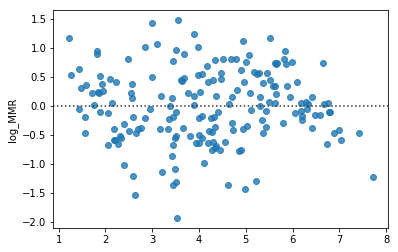

In [146]:
Y_logs_3 = l3parms[0] + test_data['Teen_fertility']*l3parms[1] + test_data['Immunization_measles']*l3parms[2] + test_data['Internet_use']*l3parms[3] + test_data['log_GDP']*l3parms[4]

sns.residplot(Y_logs_3,test_data['log_MMR'])

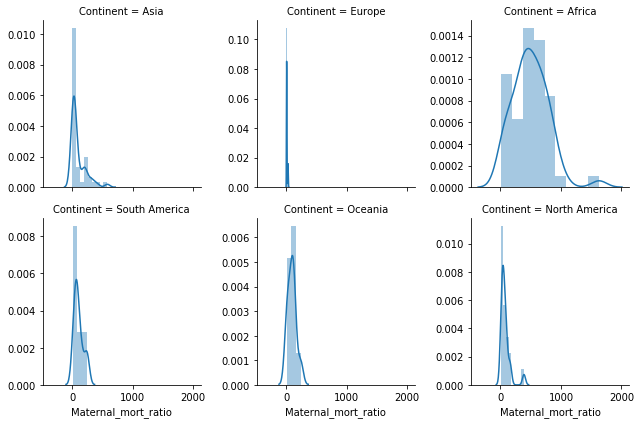

In [158]:
g = sns.FacetGrid(test_data, col="Continent", col_wrap = 3,sharey=False) 
g.map(sns.distplot, "Maternal_mort_ratio")

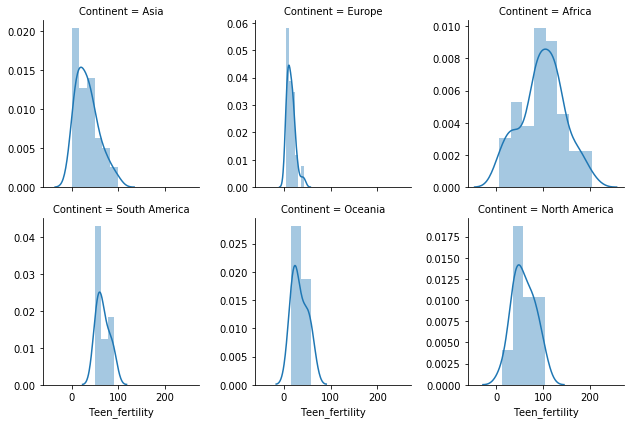

In [160]:
g = sns.FacetGrid(test_data, col="Continent", col_wrap = 3,sharey=False) 
g.map(sns.distplot, "Teen_fertility")

In [161]:
continent_dummy = pd.get_dummies(test_data['Continent'])
continent_dummy.tail(10)

,Africa,Asia,Europe,North America,Oceania,South America
173,0,0,0,1,0,0
174,0,0,0,0,0,1
175,0,1,0,0,0,0
176,0,0,0,0,1,0
177,0,0,0,0,0,1
178,0,1,0,0,0,0
179,0,1,0,0,0,0
180,0,1,0,0,0,0
181,1,0,0,0,0,0
182,1,0,0,0,0,0


In [166]:
continent_dummy.columns = ['Africa', 'Asia', 'Europe', 'North_America', 'Oceania', 'South_America']

In [167]:
df_dummies = pd.concat([test_data, continent_dummy], axis = 1)
df_dummies.head()

,Year,Country,Teen_fertility,ATMs,Compulsory_Ed,GDP_pc,Immunization_measles,Internet_use,Maternal_mort_ratio,Region,...,log_ATMs,log_MMR,log_GDP,log_internet,Africa,Asia,Europe,North_America,Oceania,South_America
0,2010,Afghanistan,98.6322,0.532064,9.0,550.514974,62.0,4.0,584.0,Southern Asia,...,-0.630992,6.369901,6.310854,1.386294,0,1,0,0,0,0
1,2010,Albania,19.8208,34.136791,8.0,4094.360204,99.0,45.0,30.0,Southern Europe,...,3.530376,3.401197,8.317366,3.806662,0,0,1,0,0,0
2,2010,Algeria,10.8084,5.895808,10.0,4463.394675,95.0,12.5,147.0,Northern Africa,...,1.774242,4.990433,8.403665,2.525729,1,0,0,0,0,0
3,2010,Angola,172.0946,10.467709,6.0,3585.905553,67.0,2.8,561.0,Middle Africa,...,2.348295,6.329721,8.184766,1.029619,1,0,0,0,0,0
4,2010,Argentina,63.8792,41.907589,13.0,10276.260498,95.0,45.0,58.0,South America,...,3.735467,4.060443,9.237592,3.806662,0,0,0,0,0,1


In [169]:
results_continents = smf.ols('Maternal_mort_ratio ~ Africa+Asia+Europe+North_America+Oceania', df_dummies).fit()
results_continents.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Maternal_mort_ratio   R-squared:                       0.559
Model:                             OLS   Adj. R-squared:                  0.546
Method:                  Least Squares   F-statistic:                     44.83
Date:                 Thu, 18 Apr 2019   Prob (F-statistic):           9.67e-30
Time:                         13:42:08   Log-Likelihood:                -1205.9
No. Observations:                  183   AIC:                             2424.
Df Residuals:                      177   BIC:                             2443.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       109.0000     51.658      2.110      0.036       7.056     210.944
Africa          391.1321     57.208      6.837      0.000     278.235     504.029
Asia            -10.3958     57.755     -0.180      0.857    -124.373     103.581
Europe          -98.1538     59.073     -1.662      0.098    -214.732      18.424
North_America   -30.2381     64.756     -0.467      0.641    -158.032      97.556
Oceania         -15.1000     76.621     -0.197      0.844    -166.308     136.108
==============================================================================
Omnibus:                       83.853   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              767.310
Skew:                           1.439   Prob(JB):                    2.40e-167
Kurtosis:                      12.610   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
results_continents_lmmr = smf.ols('log_MMR ~ Africa+Asia+Europe+North_America+Oceania', df_dummies).fit()
results_continents_lmmr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_MMR   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     68.50
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           1.43e-39
Time:                        13:42:59   Log-Likelihood:                -252.78
No. Observations:                 183   AIC:                             517.6
Df Residuals:                     177   BIC:                             536.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.4359      0.283     15.692      0.000       3.878       4.994
Africa            1.5003      0.313      4.792      0.000       0.883       2.118
Asia             -0.5620      0.316     -1.778      0.077      -1.186       0.062
Europe           -2.2744      0.323     -7.036      0.000      -2.912      -1.636
North_America    -0.4491      0.354     -1.267      0.207      -1.148       0.250
Oceania          -0.3085      0.419     -0.736      0.463      -1.136       0.519
==============================================================================
Omnibus:                       11.171   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.974
Skew:                          -0.465   Prob(JB):                      0.00152
Kurtosis:                       3.916   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
df_dummies.corr()

,Year,Teen_fertility,ATMs,Compulsory_Ed,GDP_pc,Immunization_measles,Internet_use,Maternal_mort_ratio,log_ATMs,log_MMR,log_GDP,log_internet,Africa,Asia,Europe,North_America,Oceania,South_America
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Teen_fertility,NaN,1.000000,-0.533852,-0.269641,-0.495486,-0.566298,-0.649391,0.765466,-0.698562,0.791104,-0.663078,-0.688949,0.657800,-0.272738,-0.456264,0.042741,-0.109118,0.079289
ATMs,NaN,-0.533852,1.000000,0.278786,0.619049,0.339857,0.722942,-0.495489,0.775440,-0.668243,0.712555,0.635820,-0.452152,-0.027590,0.442759,0.109166,-0.002870,0.007153
Compulsory_Ed,NaN,-0.269641,0.278786,1.000000,0.260910,0.212865,0.344609,-0.305744,0.340805,-0.349949,0.353557,0.394774,-0.301854,-0.082492,0.203096,0.149238,-0.035918,0.204542
GDP_pc,NaN,-0.495486,0.619049,0.260910,1.000000,0.262861,0.813016,-0.412616,0.557011,-0.664285,0.811707,0.599820,-0.359762,-0.025388,0.477294,0.001762,-0.021827,-0.067489
Immunization_measles,NaN,-0.566298,0.339857,0.212865,0.262861,1.000000,0.452870,-0.587382,0.536995,-0.560787,0.424628,0.537353,-0.402407,0.127323,0.230306,0.116895,-0.125971,0.095262
Internet_use,NaN,-0.649391,0.722942,0.344609,0.813016,0.452870,1.000000,-0.620461,0.762288,-0.854247,0.872047,0.866317,-0.534782,-0.049760,0.632490,0.035242,-0.063097,0.034567
Maternal_mort_ratio,NaN,0.765466,-0.495489,-0.305744,-0.412616,-0.587382,-0.620461,1.000000,-0.779290,0.823644,-0.708849,-0.769740,0.736953,-0.215461,-0.360425,-0.157061,-0.091143,-0.085327
log_ATMs,NaN,-0.698562,0.775440,0.340805,0.557011,0.536995,0.762288,-0.779290,1.000000,-0.803806,0.824478,0.848792,-0.660793,0.029716,0.465085,0.182463,0.035949,0.113226
log_MMR,NaN,0.791104,-0.668243,-0.349949,-0.664285,-0.560787,-0.854247,0.823644,-0.803806,1.000000,-0.853016,-0.831437,0.683541,-0.106978,-0.633479,-0.039953,-0.006198,0.042705


In [308]:
results_logs_conts = smf.ols('log_MMR ~ Teen_fertility+Immunization_measles+Internet_use+log_GDP+Asia+Europe+North_America+Oceania', df_dummies).fit()
results_logs_conts.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_MMR   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     182.0
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           2.46e-80
Time:                        19:03:53   Log-Likelihood:                -146.59
No. Observations:                 183   AIC:                             311.2
Df Residuals:                     174   BIC:                             340.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.9009      0.648     15.288      0.000       8.623      11.179
Teen_fertility           0.0051      0.002      2.997      0.003       0.002       0.009
Immunization_measles    -0.0191      0.004     -4.591      0.000      -0.027      -0.011
Internet_use            -0.0113      0.004     -3.127      0.002      -0.018      -0.004
log_GDP                 -0.4046      0.060     -6.690      0.000      -0.524      -0.285
Asia                    -0.7112      0.133     -5.362      0.000      -0.973      -0.449
Europe                  -1.3412      0.170     -7.907      0.000      -1.676      -1.006
North_America           -0.4948      0.150     -3.301      0.001      -0.791      -0.199
Oceania                 -0.7409      0.211     -3.517      0.001      -1.157      -0.325
==============================================================================
Omnibus:                        2.595   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.277
Skew:                          -0.267   Prob(JB):                        0.320
Kurtosis:                       3.117   Cond. No.                     1.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [176]:
Y_logs_conts = results_logs_conts.predict(df_dummies[['Teen_fertility','Immunization_measles','Internet_use','log_GDP','Asia','Europe','North_America','Oceania']])

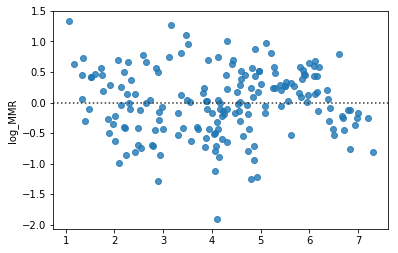

In [178]:
sns.residplot(Y_logs_conts, df_dummies['log_MMR'])

In [180]:
import scipy as sp

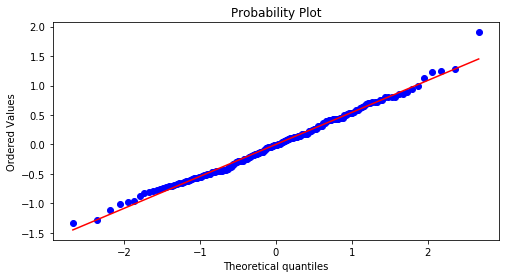

In [183]:
residual = Y_logs_conts - df_dummies['log_MMR']

fig, ax = plt.subplots(figsize=(8,4))
sp.stats.probplot(residual, plot=ax, fit=True);

In [188]:
results_logs_conts.params

Intercept               9.900881
Teen_fertility          0.005132
Immunization_measles   -0.019051
Internet_use           -0.011311
log_GDP                -0.404588
Asia                   -0.711228
Europe                 -1.341202
North_America          -0.494809
Oceania                -0.740856
dtype: float64

In [189]:
params = pd.DataFrame(results_logs_conts.params)

In [191]:
params.columns = ['Model']
params

,Model
Intercept,9.900881
Teen_fertility,0.005132
Immunization_measles,-0.019051
Internet_use,-0.011311
log_GDP,-0.404588
Asia,-0.711228
Europe,-1.341202
North_America,-0.494809
Oceania,-0.740856


In [192]:
params['e'] = np.exp(params['Model'])

In [201]:
params['Percentage'] = params['e'].apply(lambda x: round((x-1)*100, 3))

In [211]:
params.loc['log_GDP','e'] = float('NaN')
params.loc['log_GDP','Percentage'] = round(params.loc['log_GDP','Model'], 3)

In [212]:
params.drop('Intercept')

,Model,e,Percentage
Teen_fertility,0.005132,1.005145,0.514
Immunization_measles,-0.019051,0.981129,-1.887
Internet_use,-0.011311,0.988753,-1.125
log_GDP,-0.404588,NaN,-0.405
Asia,-0.711228,0.491041,-50.896
Europe,-1.341202,0.261531,-73.847
North_America,-0.494809,0.609687,-39.031
Oceania,-0.740856,0.476706,-52.329


# Predictions

In [213]:
predict_data = mortality[mortality['Year'] == 2014].copy()

In [215]:
predict_data = predict_data[['Year', 'Country Name', 
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Immunization, measles (% of children ages 12-23 months)',
       'GDP per capita (constant 2010 US$)',
       'Individuals using the Internet (% of population)',
       'Maternal mortality ratio (modeled estimate, per 100,000 live births)']]

In [218]:
predict_data.dropna(inplace = True)

In [219]:
predict_data

Series Name,Year,Country Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Immunization, measles (% of children ages 12-23 months)",GDP per capita (constant 2010 US$),Individuals using the Internet (% of population),"Maternal mortality ratio (modeled estimate, per 100,000 live births)"
24,2014,Afghanistan,77.4586,60.0,594.574110,7.000000,425.0
50,2014,Albania,20.7048,98.0,4413.335122,60.100000,29.0
76,2014,Algeria,10.9888,95.0,4675.885024,29.500000,141.0
102,2014,Angola,160.2386,56.0,3846.240911,10.200000,493.0
128,2014,Argentina,63.5016,95.0,10323.206940,64.700000,54.0
154,2014,Armenia,25.5950,97.0,3827.343195,54.622806,26.0
180,2014,Australia,14.0414,94.0,54546.203062,84.000000,6.0
206,2014,Austria,7.8360,96.0,47922.339848,80.995825,4.0
232,2014,Azerbaijan,50.7880,98.0,6122.980489,75.000016,26.0
258,2014,"Bahamas, The",30.3582,92.0,27246.484861,76.920000,83.0


In [222]:
predict_data.columns=['Year', 'Country',
       'Teen_fertility',
       'Immunization_measles',
       'GDP_pc',
       'Internet_use',
       'Maternal_mort_ratio']

In [223]:
predict_data = pd.merge(predict_data, region_df, on='Country', how='left')

In [225]:
predict_data.dropna(inplace = True)

In [226]:
predict_data

,Year,Country,Teen_fertility,Immunization_measles,GDP_pc,Internet_use,Maternal_mort_ratio,Region,Continent
0,2014,Afghanistan,77.4586,60.0,594.574110,7.000000,425.0,Southern Asia,Asia
1,2014,Albania,20.7048,98.0,4413.335122,60.100000,29.0,Southern Europe,Europe
2,2014,Algeria,10.9888,95.0,4675.885024,29.500000,141.0,Northern Africa,Africa
3,2014,Angola,160.2386,56.0,3846.240911,10.200000,493.0,Middle Africa,Africa
4,2014,Argentina,63.5016,95.0,10323.206940,64.700000,54.0,South America,South America
5,2014,Armenia,25.5950,97.0,3827.343195,54.622806,26.0,Western Asia,Asia
6,2014,Australia,14.0414,94.0,54546.203062,84.000000,6.0,Australia and New Zealand,Oceania
7,2014,Austria,7.8360,96.0,47922.339848,80.995825,4.0,Western Europe,Europe
8,2014,Azerbaijan,50.7880,98.0,6122.980489,75.000016,26.0,Western Asia,Asia
10,2014,Bahrain,13.7430,99.0,22390.682851,90.503133,15.0,Western Asia,Asia


In [227]:
pred_dummies = pd.get_dummies(predict_data['Continent'])

In [230]:
pred_dummies.columns = ['Africa', 'Asia', 'Europe', 'North_America', 'Oceania',
       'South_America']

In [231]:
predict_data = pd.concat([predict_data, pred_dummies], axis = 1)

In [233]:
predict_data['log_GDP'] =  np.log(predict_data['GDP_pc'])

In [235]:
predict_data['Prediction'] = results_logs_conts.predict(predict_data[['Teen_fertility','Immunization_measles','Internet_use','log_GDP','Asia','Europe','North_America','Oceania']])
    

In [237]:
predict_data['log_MMR'] = np.log(predict_data['Maternal_mort_ratio'])

In [238]:
predict_data['SqErr'] = (predict_data['Prediction'] - predict_data['log_MMR'])**2

In [239]:
sum(predict_data['SqErr'])/len(predict_data['SqErr'])

0.32287386852532457

In [242]:
predict_data[['Year','Country','Teen_fertility','Immunization_measles','Internet_use','log_GDP','Asia','Europe','North_America','Oceania','Prediction','log_MMR']].head(10)

,Year,Country,Teen_fertility,Immunization_measles,Internet_use,log_GDP,Asia,Europe,North_America,Oceania,Prediction,log_MMR
0,2014,Afghanistan,77.4586,60.0,7.000000,6.387845,1,0,0,0,5.780469,6.052089
1,2014,Albania,20.7048,98.0,60.100000,8.392386,0,1,0,0,2.723728,3.367296
2,2014,Algeria,10.9888,95.0,29.500000,8.450174,0,0,0,0,4.394946,4.948760
3,2014,Angola,160.2386,56.0,10.200000,8.254852,0,0,0,0,6.201128,6.200509
4,2014,Argentina,63.5016,95.0,64.700000,9.242150,0,0,0,0,3.945864,3.988984
5,2014,Armenia,25.5950,97.0,54.622806,8.249926,1,0,0,0,3.517435,3.258097
6,2014,Australia,14.0414,94.0,84.000000,10.906803,0,0,0,1,2.078461,1.791759
7,2014,Austria,7.8360,96.0,80.995825,10.777337,0,1,0,0,1.494528,1.386294
8,2014,Azerbaijan,50.7880,98.0,75.000016,8.719804,1,0,0,0,3.207080,3.258097
10,2014,Bahrain,13.7430,99.0,90.503133,10.016400,1,0,0,0,2.297996,2.708050


In [243]:
np.sqrt(sum(predict_data['SqErr'])/len(predict_data['SqErr']))

0.5682199121161846

In [244]:
predict_data['log_MMR'].describe()

count    152.000000
mean       3.976937
std        1.658634
min        1.098612
25%        2.484907
50%        3.941157
75%        5.442418
max        7.251345
Name: log_MMR, dtype: float64

In [249]:
from sklearn.metrics import mean_squared_error

In [250]:
import math

In [251]:
mean_squared_error = mean_squared_error(predict_data['log_MMR'], predict_data['Prediction'])
print('Mean squared error:',mean_squared_error)
rmse = math.sqrt(mean_squared_error)

Mean squared error: 0.3228738685253245


In [253]:
rmse/predict_data['log_MMR'].mean()

0.14287877331171106

In [254]:
predict_data['Untrans_Preds'] = np.exp(predict_data['Prediction'])

In [258]:
predict_data['Untrans_SqErr'] = (predict_data['Untrans_Preds'] - predict_data['Maternal_mort_ratio'])**2

In [259]:
mse = sum(predict_data['Untrans_SqErr'])/len(predict_data['Untrans_SqErr'])
print('Mean squared error:',mse)

Mean squared error: 24207.213518204524


In [262]:
rmse_untrans = math.sqrt(mse)
print('Root mean squared error:',rmse_untrans)

Root mean squared error: 155.58667525917676


In [264]:
rmse_untrans/predict_data['Maternal_mort_ratio'].mean()

0.9456265600141895

In [265]:
predict_data.head()

,Year,Country,Teen_fertility,Immunization_measles,GDP_pc,Internet_use,Maternal_mort_ratio,Region,Continent,Africa,...,Europe,North_America,Oceania,South_America,log_GDP,Prediction,log_MMR,SqErr,Untrans_Preds,Untrans_SqErr
0,2014,Afghanistan,77.4586,60.0,594.574110,7.0,425.0,Southern Asia,Asia,0,...,0,0,0,0,6.387845,5.780469,6.052089,7.377744e-02,323.911115,10218.962757
1,2014,Albania,20.7048,98.0,4413.335122,60.1,29.0,Southern Europe,Europe,0,...,1,0,0,0,8.392386,2.723728,3.367296,4.141798e-01,15.237017,189.419707
2,2014,Algeria,10.9888,95.0,4675.885024,29.5,141.0,Northern Africa,Africa,1,...,0,0,0,0,8.450174,4.394946,4.948760,3.067103e-01,81.040222,3595.174975
3,2014,Angola,160.2386,56.0,3846.240911,10.2,493.0,Middle Africa,Africa,1,...,0,0,0,0,8.254852,6.201128,6.200509,3.834851e-07,493.305391,0.093263
4,2014,Argentina,63.5016,95.0,10323.206940,64.7,54.0,South America,South America,0,...,0,0,0,1,9.242150,3.945864,3.988984,1.859343e-03,51.721003,5.193826


In [266]:
predict_data['Maternal_mort_ratio'].mean()

164.5328947368421

In [268]:
predict_data['Untrans_Err'] = predict_data['Untrans_Preds'] - predict_data['Maternal_mort_ratio']

In [270]:
predict_data[['Country','Maternal_mort_ratio','Untrans_Preds','Untrans_Err','Untrans_SqErr']]

,Country,Maternal_mort_ratio,Untrans_Preds,Untrans_Err,Untrans_SqErr
0,Afghanistan,425.0,323.911115,-101.088885,10218.962757
1,Albania,29.0,15.237017,-13.762983,189.419707
2,Algeria,141.0,81.040222,-59.959778,3595.174975
3,Angola,493.0,493.305391,0.305391,0.093263
4,Argentina,54.0,51.721003,-2.278997,5.193826
5,Armenia,26.0,33.697873,7.697873,59.257256
6,Australia,6.0,7.992156,1.992156,3.968685
7,Austria,4.0,4.457234,0.457234,0.209063
8,Azerbaijan,26.0,24.706825,-1.293175,1.672302
10,Bahrain,15.0,9.954210,-5.045790,25.459998


In [272]:
from sklearn.linear_model import LinearRegression

In [297]:
df_dummies.columns

Index(['Year', 'Country', 'Teen_fertility', 'ATMs', 'Compulsory_Ed', 'GDP_pc',
       'Immunization_measles', 'Internet_use', 'Maternal_mort_ratio', 'Region',
       'Continent', 'log_ATMs', 'log_MMR', 'log_GDP', 'log_internet', 'Africa',
       'Asia', 'Europe', 'North_America', 'Oceania', 'South_America'],
      dtype='object')

In [299]:
df_dummies.drop(['log_ATMs', 'log_internet'], axis=1, inplace = True)

In [301]:
df_dummies.drop(['ATMs', 'Compulsory_Ed','GDP_pc'], axis=1, inplace = True)

In [300]:
df_dummies['TFxAfrica'] = df_dummies['Teen_fertility'] * df_dummies['Africa']

In [302]:
df_dummies['IMxAfrica'] = df_dummies['Immunization_measles'] * df_dummies['Africa']
df_dummies['IUxAfrica'] = df_dummies['Internet_use'] * df_dummies['Africa']
df_dummies['lGDPxAfrica'] = df_dummies['log_GDP'] * df_dummies['Africa']

In [309]:
results_logs_conts_ints = smf.ols('log_MMR ~ Teen_fertility+Immunization_measles+Internet_use+log_GDP+Africa+Asia+Europe+North_America+Oceania+TFxAfrica+IMxAfrica+IUxAfrica+lGDPxAfrica', df_dummies).fit()
results_logs_conts_ints.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_MMR   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     110.9
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           1.66e-75
Time:                        19:04:13   Log-Likelihood:                -144.98
No. Observations:                 183   AIC:                             318.0
Df Residuals:                     169   BIC:                             362.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.6874      0.986      9.820      0.000       7.740      11.635
Teen_fertility           0.0072      0.003      2.074      0.040       0.000       0.014
Immunization_measles    -0.0218      0.006     -3.858      0.000      -0.033      -0.011
Internet_use            -0.0100      0.004     -2.242      0.026      -0.019      -0.001
log_GDP                 -0.3833      0.088     -4.356      0.000      -0.557      -0.210
Africa                  -0.2079      1.386     -0.150      0.881      -2.943       2.527
Asia                    -0.5343      0.221     -2.419      0.017      -0.970      -0.098
Europe                  -1.1928      0.244     -4.889      0.000      -1.674      -0.711
North_America           -0.3801      0.203     -1.871      0.063      -0.781       0.021
Oceania                 -0.5814      0.285     -2.040      0.043      -1.144      -0.019
TFxAfrica               -0.0027      0.004     -0.664      0.507      -0.011       0.005
IMxAfrica                0.0078      0.009      0.915      0.361      -0.009       0.025
IUxAfrica               -0.0116      0.011     -1.030      0.304      -0.034       0.011
lGDPxAfrica              0.0073      0.126      0.058      0.954      -0.241       0.255
==============================================================================
Omnibus:                        5.409   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                5.262
Skew:                          -0.310   Prob(JB):                       0.0720
Kurtosis:                       3.554   Cond. No.                     4.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [324]:
corr = df_dummies[['Teen_fertility','Immunization_measles','Internet_use','Region','Continent', 
                   'log_MMR', 'log_GDP', 'Africa','Asia', 'Europe', 'North_America', 'Oceania', 'South_America']].corr()

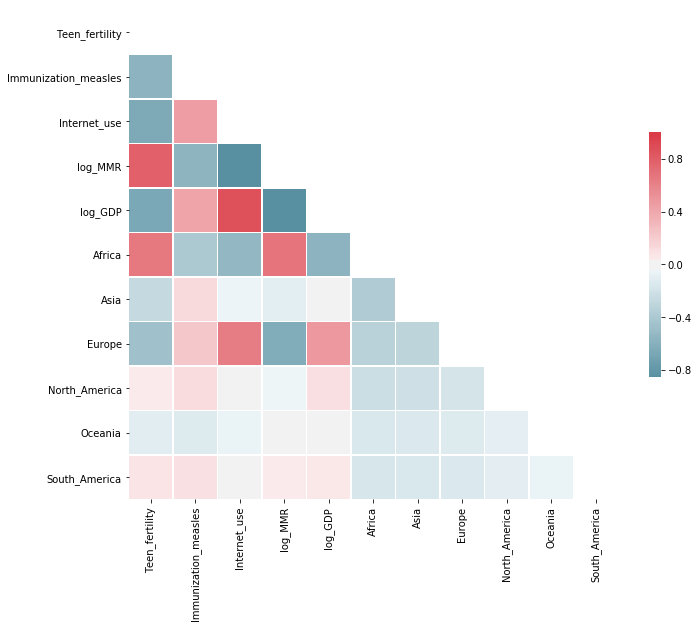

In [325]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [311]:
results_logs_conts2 = smf.ols('log_MMR ~ Teen_fertility+Immunization_measles+Internet_use+log_GDP+Africa+Asia+North_America+Oceania+South_America', df_dummies).fit()
results_logs_conts2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_MMR   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     161.4
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           2.60e-79
Time:                        19:06:53   Log-Likelihood:                -146.29
No. Observations:                 183   AIC:                             312.6
Df Residuals:                     173   BIC:                             344.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                8.4558      0.636     13.292      0.000       7.200       9.711
Teen_fertility           0.0051      0.002      2.974      0.003       0.002       0.008
Immunization_measles    -0.0186      0.004     -4.446      0.000      -0.027      -0.010
Internet_use            -0.0112      0.004     -3.084      0.002      -0.018      -0.004
log_GDP                 -0.3987      0.061     -6.530      0.000      -0.519      -0.278
Africa                   1.3952      0.185      7.561      0.000       1.031       1.759
Asia                     0.6440      0.144      4.475      0.000       0.360       0.928
North_America            0.8578      0.175      4.888      0.000       0.511       1.204
Oceania                  0.6196      0.218      2.841      0.005       0.189       1.050
South_America            1.2528      0.207      6.054      0.000       0.844       1.661
==============================================================================
Omnibus:                        3.136   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                2.747
Skew:                          -0.286   Prob(JB):                        0.253
Kurtosis:                       3.180   Cond. No.                     1.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [312]:
df_dummies['TFxEurope'] = df_dummies['Teen_fertility'] * df_dummies['Europe']
df_dummies['IMxEurope'] = df_dummies['Immunization_measles'] * df_dummies['Europe']
df_dummies['IUxEurope'] = df_dummies['Internet_use'] * df_dummies['Europe']
df_dummies['lGDPxEurope'] = df_dummies['log_GDP'] * df_dummies['Europe']

In [316]:
results_logs_conts_ints2 = smf.ols('log_MMR ~ Teen_fertility+Immunization_measles+Internet_use+log_GDP+Asia+Europe+North_America+Oceania+TFxEurope+IMxEurope+IUxEurope+lGDPxEurope', df_dummies).fit()
results_logs_conts_ints2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_MMR   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     133.3
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           8.86e-80
Time:                        22:05:38   Log-Likelihood:                -136.95
No. Observations:                 183   AIC:                             299.9
Df Residuals:                     170   BIC:                             341.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.0209      0.656     15.284      0.000       8.727      11.315
Teen_fertility           0.0040      0.002      2.358      0.019       0.001       0.007
Immunization_measles    -0.0192      0.004     -4.467      0.000      -0.028      -0.011
Internet_use            -0.0168      0.004     -4.382      0.000      -0.024      -0.009
log_GDP                 -0.3940      0.062     -6.404      0.000      -0.515      -0.273
Asia                    -0.7041      0.128     -5.505      0.000      -0.956      -0.452
Europe                  -4.4672      2.071     -2.157      0.032      -8.554      -0.380
North_America           -0.4349      0.145     -3.000      0.003      -0.721      -0.149
Oceania                 -0.7607      0.204     -3.738      0.000      -1.162      -0.359
TFxEurope                0.0220      0.014      1.583      0.115      -0.005       0.049
IMxEurope                0.0086      0.012      0.734      0.464      -0.014       0.032
IUxEurope                0.0227      0.010      2.336      0.021       0.004       0.042
lGDPxEurope              0.0719      0.196      0.366      0.715      -0.316       0.459
==============================================================================
Omnibus:                        5.303   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                5.013
Skew:                          -0.325   Prob(JB):                       0.0816
Kurtosis:                       3.486   Cond. No.                     5.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [314]:
df_dummies['TFxNorth_America'] = df_dummies['Teen_fertility'] * df_dummies['North_America']
df_dummies['IMxNorth_America'] = df_dummies['Immunization_measles'] * df_dummies['North_America']
df_dummies['IUxNorth_America'] = df_dummies['Internet_use'] * df_dummies['North_America']
df_dummies['lGDPxNorth_America'] = df_dummies['log_GDP'] * df_dummies['North_America']
df_dummies['TFxOceania'] = df_dummies['Teen_fertility'] * df_dummies['Oceania']
df_dummies['IMxOceania'] = df_dummies['Immunization_measles'] * df_dummies['Oceania']
df_dummies['IUxOceania'] = df_dummies['Internet_use'] * df_dummies['Oceania']
df_dummies['lGDPxOceania'] = df_dummies['log_GDP'] * df_dummies['Oceania']

In [319]:
results_logs_conts_ints3 = smf.ols('log_MMR ~ Teen_fertility+Immunization_measles+Internet_use+log_GDP+Asia+Europe+North_America+Oceania+TFxEurope+IMxEurope+IUxEurope+lGDPxEurope+TFxNorth_America+IMxNorth_America+IUxNorth_America+lGDPxNorth_America+TFxOceania+IMxOceania+IUxOceania+lGDPxOceania', df_dummies).fit()
results_logs_conts_ints3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_MMR   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     77.79
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           2.55e-72
Time:                        22:07:31   Log-Likelihood:                -135.25
No. Observations:                 183   AIC:                             312.5
Df Residuals:                     162   BIC:                             379.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.0384      0.736     13.636      0.000       8.585      11.492
Teen_fertility           0.0038      0.002      2.016      0.045    7.71e-05       0.007
Immunization_measles    -0.0197      0.005     -4.006      0.000      -0.029      -0.010
Internet_use            -0.0191      0.004     -4.322      0.000      -0.028      -0.010
log_GDP                 -0.3841      0.065     -5.896      0.000      -0.513      -0.255
Asia                    -0.6878      0.133     -5.171      0.000      -0.950      -0.425
Europe                  -4.4847      2.125     -2.110      0.036      -8.681      -0.289
North_America           -0.7727      2.190     -0.353      0.725      -5.097       3.552
Oceania                  1.6347      5.772      0.283      0.777      -9.763      13.032
TFxEurope                0.0222      0.014      1.572      0.118      -0.006       0.050
IMxEurope                0.0091      0.012      0.752      0.453      -0.015       0.033
IUxEurope                0.0249      0.010      2.476      0.014       0.005       0.045
lGDPxEurope              0.0620      0.200      0.310      0.757      -0.333       0.457
TFxNorth_America         0.0009      0.007      0.116      0.907      -0.014       0.015
IMxNorth_America         0.0024      0.020      0.119      0.906      -0.038       0.042
IUxNorth_America         0.0089      0.017      0.531      0.596      -0.024       0.042
lGDPxNorth_America      -0.0232      0.331     -0.070      0.944      -0.678       0.631
TFxOceania              -0.0066      0.013     -0.492      0.623      -0.033       0.020
IMxOceania               0.0104      0.022      0.485      0.629      -0.032       0.053
IUxOceania               0.0171      0.030      0.576      0.565      -0.041       0.076
lGDPxOceania            -0.4087      0.634     -0.644      0.520      -1.661       0.844
==============================================================================
Omnibus:                        6.292   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                6.362
Skew:                          -0.333   Prob(JB):                       0.0415
Kurtosis:                       3.624   Cond. No.                     1.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [321]:
results_logs_conts_ints4 = smf.ols('log_MMR ~ Teen_fertility+Immunization_measles+Internet_use+log_GDP+North_America+Oceania+Asia+Europe+IUxEurope', df_dummies).fit()
results_logs_conts_ints4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_MMR   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     177.3
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           1.82e-82
Time:                        22:10:29   Log-Likelihood:                -138.57
No. Observations:                 183   AIC:                             297.1
Df Residuals:                     173   BIC:                             329.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.8799      0.622     15.892      0.000       8.653      11.107
Teen_fertility           0.0045      0.002      2.707      0.007       0.001       0.008
Immunization_measles    -0.0178      0.004     -4.450      0.000      -0.026      -0.010
Internet_use            -0.0166      0.004     -4.465      0.000      -0.024      -0.009
log_GDP                 -0.3977      0.058     -6.848      0.000      -0.512      -0.283
North_America           -0.4318      0.145     -2.983      0.003      -0.718      -0.146
Oceania                 -0.7289      0.202     -3.605      0.000      -1.128      -0.330
Asia                    -0.6865      0.127     -5.386      0.000      -0.938      -0.435
Europe                  -2.4308      0.319     -7.632      0.000      -3.059      -1.802
IUxEurope                0.0199      0.005      3.980      0.000       0.010       0.030
==============================================================================
Omnibus:                        3.691   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                3.324
Skew:                          -0.249   Prob(JB):                        0.190
Kurtosis:                       3.433   Cond. No.                     1.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [355]:
Y_logs_conts_ints4 = results_logs_conts_ints4.predict(df_dummies[['Teen_fertility','Immunization_measles','Internet_use','log_GDP','North_America','Oceania','Asia','Europe','IUxEurope']])

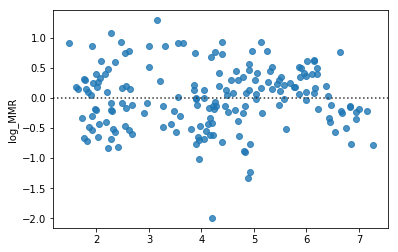

In [356]:
sns.residplot(Y_logs_conts_ints4, df_dummies['log_MMR'])

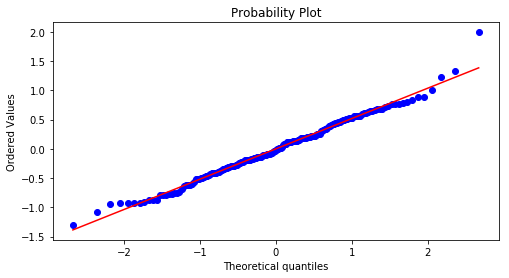

In [357]:
residual = Y_logs_conts_ints4 - df_dummies['log_MMR']

fig, ax = plt.subplots(figsize=(8,4))
sp.stats.probplot(residual, plot=ax, fit=True);

In [360]:
params2 = pd.DataFrame(results_logs_conts_ints4.params)

In [361]:
params2.columns = ['Model']
params2

,Model
Intercept,9.879903
Teen_fertility,0.004472
Immunization_measles,-0.017785
Internet_use,-0.016604
log_GDP,-0.397712
North_America,-0.431834
Oceania,-0.728902
Asia,-0.686526
Europe,-2.430763
IUxEurope,0.019884


In [362]:
params2['e'] = np.exp(params2['Model'])


In [363]:
params2['Percentage'] = params2['e'].apply(lambda x: round((x-1)*100, 3))

In [365]:
params2.loc['log_GDP','e'] = float('NaN')
params2.loc['log_GDP','Percentage'] = round(params2.loc['log_GDP','Model'], 3)

In [367]:
params2.drop('Intercept')

,Model,e,Percentage
Teen_fertility,0.004472,1.004482,0.448
Immunization_measles,-0.017785,0.982372,-1.763
Internet_use,-0.016604,0.983534,-1.647
log_GDP,-0.397712,NaN,-0.398
North_America,-0.431834,0.649317,-35.068
Oceania,-0.728902,0.482438,-51.756
Asia,-0.686526,0.503322,-49.668
Europe,-2.430763,0.087970,-91.203
IUxEurope,0.019884,1.020083,2.008


In [359]:
#Model without Sierra Leone
results_logs_conts_ints5 = smf.ols('log_MMR ~ Teen_fertility+Immunization_measles+Internet_use+log_GDP+North_America+Oceania+Asia+Europe+IUxEurope', df_dummies.drop(142)).fit()
results_logs_conts_ints5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_MMR   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     174.6
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           1.20e-81
Time:                        23:16:29   Log-Likelihood:                -137.17
No. Observations:                 182   AIC:                             294.3
Df Residuals:                     172   BIC:                             326.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.8771      0.620     15.941      0.000       8.654      11.100
Teen_fertility           0.0043      0.002      2.580      0.011       0.001       0.008
Immunization_measles    -0.0181      0.004     -4.545      0.000      -0.026      -0.010
Internet_use            -0.0168      0.004     -4.525      0.000      -0.024      -0.009
log_GDP                 -0.3922      0.058     -6.762      0.000      -0.507      -0.278
North_America           -0.4277      0.144     -2.964      0.003      -0.713      -0.143
Oceania                 -0.7328      0.202     -3.636      0.000      -1.131      -0.335
Asia                    -0.6870      0.127     -5.408      0.000      -0.938      -0.436
Europe                  -2.4279      0.317     -7.648      0.000      -3.055      -1.801
IUxEurope                0.0198      0.005      3.970      0.000       0.010       0.030
==============================================================================
Omnibus:                        4.119   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                3.811
Skew:                          -0.262   Prob(JB):                        0.149
Kurtosis:                       3.478   Cond. No.                     1.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [358]:
df_dummies.sort_values('Maternal_mort_ratio', ascending = False)

,Year,Country,Teen_fertility,Immunization_measles,Internet_use,Maternal_mort_ratio,Region,Continent,log_MMR,log_GDP,...,IUxEurope,lGDPxEurope,TFxNorth_America,IMxNorth_America,IUxNorth_America,lGDPxNorth_America,TFxOceania,IMxOceania,IUxOceania,lGDPxOceania
142,2010,Sierra Leone,134.3892,82.0,0.580000,1630.0,Western Africa,Africa,7.396335,5.989348,...,0.00,0.000000,0.0000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000
31,2010,Chad,185.3640,46.0,1.700000,1040.0,Middle Africa,Africa,6.946976,6.798576,...,0.00,0.000000,0.0000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000
30,2010,Central African Republic,114.8780,53.0,2.000000,909.0,Middle Africa,Africa,6.812345,6.101313,...,0.00,0.000000,0.0000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000
149,2010,South Sudan,86.1788,83.0,6.494667,876.0,Eastern Africa,Africa,6.775366,6.388908,...,0.00,0.000000,0.0000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000
120,2010,Nigeria,119.5004,56.0,11.500000,867.0,Western Africa,Africa,6.765039,7.736901,...,0.00,0.000000,0.0000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000
147,2010,Somalia,117.0854,46.0,6.494667,820.0,Eastern Africa,Africa,6.709304,6.388908,...,0.00,0.000000,0.0000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000
94,2010,Liberia,137.1728,65.0,2.300000,811.0,Western Africa,Africa,6.698268,6.226661,...,0.00,0.000000,0.0000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000
25,2010,Burundi,31.2920,92.0,1.000000,808.0,Eastern Africa,Africa,6.694562,5.445856,...,0.00,0.000000,0.0000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000
36,2010,"Congo, Dem. Rep.",129.9144,74.0,0.720000,794.0,Middle Africa,Africa,6.677083,5.811834,...,0.00,0.000000,0.0000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000
59,2010,"Gambia, The",97.9730,92.0,9.200000,753.0,Western Africa,Africa,6.624065,6.332362,...,0.00,0.000000,0.0000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000


In [326]:
import plotly_express as px

In [328]:
px.scatter(df_dummies, x="Teen_fertility", y="log_MMR", color="Continent", marginal_y="violin", 
           marginal_x="box", trendline="ols")

/Users/samantha/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [350]:
px.scatter(df_dummies, x="Immunization_measles", y="log_MMR", color="Continent", marginal_y="violin", 
           marginal_x="box", trendline="ols")

/Users/samantha/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [351]:
px.scatter(df_dummies, x="Internet_use", y="log_MMR", color="Continent", marginal_y="violin", 
           marginal_x="box", trendline="ols")

In [352]:
px.scatter(df_dummies, x="log_GDP", y="log_MMR", color="Continent", marginal_y="violin", 
           marginal_x="box", trendline="ols")

In [344]:
px.choropleth(df_dummies, locations="Country", locationmode = 'country names', color="Maternal_mort_ratio", hover_name="Country", color_continuous_scale=px.colors.sequential.thermal)

In [345]:
map_df = df_dummies.sort_values('Maternal_mort_ratio').head(100)

In [347]:
px.choropleth(map_df, locations="Country", locationmode = 'country names', color="Maternal_mort_ratio", hover_name="Country", color_continuous_scale=px.colors.sequential.thermal)

In [349]:
test_data.describe()

,Year,Teen_fertility,ATMs,Compulsory_Ed,GDP_pc,Immunization_measles,Internet_use,Maternal_mort_ratio,log_ATMs,log_MMR,log_GDP,log_internet
count,183.0,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,2010.0,53.935666,39.513899,9.233533,12300.237187,87.441626,31.351842,194.338798,-inf,4.169930,8.447210,-inf
std,0.0,44.267850,44.054962,1.969398,17756.498466,12.710762,27.016348,265.671169,NaN,1.654466,1.482139,NaN
min,2010.0,0.443200,0.000000,5.000000,231.795537,46.000000,0.000000,3.000000,-inf,1.098612,5.445856,-inf
25%,2010.0,16.996100,6.118853,8.000000,1313.911182,82.000000,7.650000,16.000000,1.811375,2.772589,7.180763,2.034513
50%,2010.0,43.334600,28.481868,9.000000,4542.904104,93.000000,26.530000,59.000000,3.349268,4.077537,8.421322,3.278276
75%,2010.0,81.285300,53.077944,10.000000,13434.498103,97.000000,47.450000,305.500000,3.971692,5.721241,9.505547,3.859432
max,2010.0,205.112600,265.375421,15.000000,104965.306078,99.000000,93.390000,1630.000000,5.581146,7.396335,11.561385,4.536784


In [353]:
test_data.sort_values('log_MMR', ascending = False)

,Year,Country,Teen_fertility,ATMs,Compulsory_Ed,GDP_pc,Immunization_measles,Internet_use,Maternal_mort_ratio,Region,Continent,log_ATMs,log_MMR,log_GDP,log_internet
142,2010,Sierra Leone,134.3892,0.386752,9.000000,399.154368,82.0,0.580000,1630.0,Western Africa,Africa,-0.949971,7.396335,5.989348,-0.544727
31,2010,Chad,185.3640,0.425380,10.000000,896.569734,46.0,1.700000,1040.0,Middle Africa,Africa,-0.854771,6.946976,6.798576,0.530628
30,2010,Central African Republic,114.8780,0.664211,10.000000,446.443688,53.0,2.000000,909.0,Middle Africa,Africa,-0.409155,6.812345,6.101313,0.693147
149,2010,South Sudan,86.1788,6.118853,8.000000,595.206173,83.0,6.494667,876.0,Eastern Africa,Africa,1.811375,6.775366,6.388908,1.870981
120,2010,Nigeria,119.5004,11.219582,9.000000,2291.360013,56.0,11.500000,867.0,Western Africa,Africa,2.417661,6.765039,7.736901,2.442347
147,2010,Somalia,117.0854,6.118853,9.233533,595.206173,46.0,6.494667,820.0,Eastern Africa,Africa,1.811375,6.709304,6.388908,1.870981
94,2010,Liberia,137.1728,1.475385,6.000000,506.063005,65.0,2.300000,811.0,Western Africa,Africa,0.388919,6.698268,6.226661,0.832909
25,2010,Burundi,31.2920,0.510020,9.233533,231.795537,92.0,1.000000,808.0,Eastern Africa,Africa,-0.673306,6.694562,5.445856,0.000000
36,2010,"Congo, Dem. Rep.",129.9144,0.405734,6.000000,334.231703,74.0,0.720000,794.0,Middle Africa,Africa,-0.902058,6.677083,5.811834,-0.328504
59,2010,"Gambia, The",97.9730,5.660692,9.000000,562.483782,92.0,9.200000,753.0,Western Africa,Africa,1.733546,6.624065,6.332362,2.219203


In [354]:
px.choropleth(df_dummies, locations="Country", locationmode = 'country names', color="log_MMR", hover_name="Country", color_continuous_scale=px.colors.sequential.thermal)

In [374]:
predict_df = predict_data[['Year', 'Country', 'Teen_fertility', 'Immunization_measles', 'Internet_use', 
                           'Maternal_mort_ratio','Asia', 'Europe', 'North_America', 'Oceania', 'log_GDP', 'log_MMR']].copy()

In [375]:
predict_df['IUxEurope'] = predict_df['Internet_use']*predict_df['Europe']

In [376]:
predict_df['Prediction'] = results_logs_conts_ints4.predict(predict_df[['Teen_fertility','Immunization_measles','Internet_use','log_GDP','North_America','Oceania','Asia','Europe', 'IUxEurope']])


In [377]:
predict_df['Error'] = predict_df['Prediction'] - predict_df['log_MMR']

In [378]:
predict_df['SqError'] = predict_df['Error']**2

In [381]:
mse = sum(predict_df['SqError'])/len(predict_df['SqError'])
mse

0.30857507038556564

In [382]:
rmse = np.sqrt(mse)
rmse

0.5554953378612332

In [383]:
predict_df['Untrans_Preds'] = np.exp(predict_df['Prediction'])

In [384]:
predict_df['Untrans_Error'] = predict_df['Untrans_Preds'] - predict_df['Maternal_mort_ratio']

In [385]:
predict_df['Untrans_SqError'] = predict_df['Untrans_Error']**2

In [386]:
untrans_mse = sum(predict_df['Untrans_SqError'])/len(predict_df['Untrans_SqError'])
untrans_mse

22362.22105587467

In [387]:
untrans_rmse = np.sqrt(untrans_mse)
untrans_rmse

149.54003161653628

In [388]:
untrans_rmse/predict_df['Maternal_mort_ratio'].mean()

0.9088761967976934

In [391]:
no_SL = results_logs_conts_ints5.predict(predict_df[['Teen_fertility','Immunization_measles','Internet_use','log_GDP','North_America','Oceania','Asia','Europe', 'IUxEurope']].drop(138))

In [395]:
(np.sqrt(sum((np.exp(no_SL) - predict_df['Maternal_mort_ratio'].drop(138))**2)/len(no_SL)))/predict_df['Maternal_mort_ratio'].drop(138).mean()

0.8411279291739032

In [397]:
test_data.to_csv('train.csv')

In [398]:
df_dummies.to_csv('train_dummies.csv')